In [1]:
import os
pt=os.getcwd()
pt

'/home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess'

In [15]:
#pip install pandas

In [56]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt

In [57]:
import os
import json

# Specify the directory containing the JSON files #/home/skbae/cancer_conquerance/Work/Mar2023/test_data/T20.pkl
#json_dir = pt + "/Prevalence/"
csv_dir = '/home/skbae/Desktop/146/cancer_conquerance/Work/Mar2023/test_data/' #Work/Mar2023/test_data' /Prevalence/

In [58]:
csv_dir

'/home/skbae/Desktop/146/cancer_conquerance/Work/Mar2023/test_data/'

In [8]:
import pandas as pd
import glob

# Get a list of all CSV files in the directory
#csv_files = glob.glob('*.csv')
#glob.glob('*.csv')
# Initialize an empty list to hold the DataFrames
#dfs = []

for filename in os.listdir(csv_dir):
    if filename.endswith('.csv'):
        print(filename)

DS.csv
BFC.csv
T20.csv


In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART I . Original Data Import

#########################################################################################
#########################################################################################

In [3]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [10]:
Dis_codeF  = pd.read_csv(csv_dir + "DS.csv")

#1. SICK codes
# Convert the DataFrame to a pickle file
with open('DS.pkl', 'wb') as f:
    pickle.dump(Dis_codeF, f)


T20 = pd.read_csv(csv_dir + "T20.csv")
# Convert the DataFrame to a pickle file
with open('T20.pkl', 'wb') as f:
    pickle.dump(T20, f)


BFC = pd.read_csv(csv_dir + "BFC.csv")
# Convert the DataFrame to a pickle file
#with open('data_pop.pkl', 'wb') as f:
#    pickle.dump(pop, f)

with open('BFC.pkl', 'wb') as f:
    pickle.dump(BFC, f)

In [ ]:
################
### 1. New data : T20.pkl, DS.pkl, BFC.pkl

In [4]:
import pandas as pd
import pickle

# Load the pickle file into a variable
# with open(csv_dir +"DS.pkl", 'rb') as f:
with open('./DS.pkl', 'rb') as f:
    data = pickle.load(f)
# Convert the data to a Pandas DataFrame
DS = pd.DataFrame(data)



#T20
# with open(csv_dir +"T20.pkl", 'rb') as f:
with open('./T20.pkl', 'rb') as f:
    data = pickle.load(f)
T20 = pd.DataFrame(data)


#pop : data_pop.pkl
with open('./BFC.pkl', 'rb') as f: #/home/skbae/cancer_conquerance/BFC.pkl
    data = pickle.load(f)
BFC = pd.DataFrame(data)

In [59]:
DS.head()

,d,dname,wash_out
0,101,Esophageal cancer,5
1,102,Stomach cancer,5
2,103,Liver cancer,5
3,104,Larynx cancer,5
4,105,"Trachea, bronchus and lung cancers",5


In [15]:
# gender dist

BFC_gender=BFC [['ID','SEX']].groupby(['SEX'], as_index=False).agg({"ID":"nunique"})
BFC_gender =pd.DataFrame(BFC_gender).reset_index()
BFC_gender['pct']=BFC_gender['ID'] /len(BFC)
BFC_gender

,index,SEX,ID,pct
0,0,1,323597,0.480244
1,1,2,350221,0.519756


In [16]:
# Age dist
bins= [0,20,30,40,50,60,70,80,90,110]
labels = ['below 20','20s','30s','40s','50s','60s','70s','80s','90s+']
BFC['AgeGroup'] = pd.cut(BFC['AGE'], bins=bins, labels=labels, right=False)
BFC.head()

,ID,SEX,AGE,GAIBJA,AgeGroup
0,1,2,51,2,50s
1,2,2,19,6,below 20
2,3,2,71,7,70s
3,4,1,51,1,50s
4,5,2,49,5,40s


In [17]:
# aggrgating data
age_p = BFC.groupby('AgeGroup')['ID'].count()
#age_p

Text(0, 0.5, 'Counter of Patients')

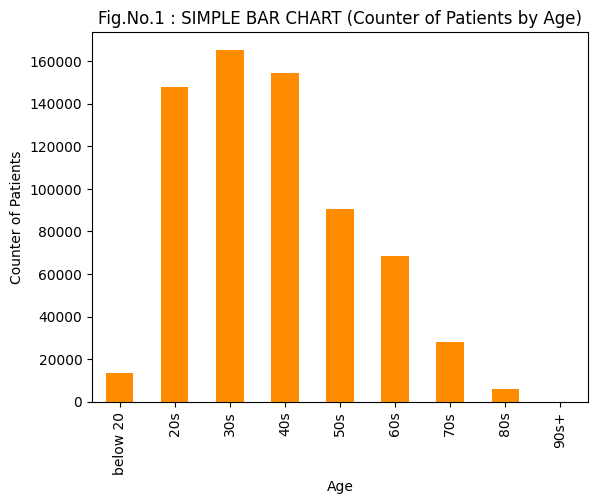

In [18]:
plt.figure(); 
age_p.plot.bar(title='Fig.No.1 : SIMPLE BAR CHART (Counter of Patients by Age)', color='darkorange'); 
plt.xlabel('Age'); plt.ylabel('Counter of Patients') 

In [ ]:
# merge disease and age,gender

In [5]:
T20_BFC=pd.merge(T20 , BFC, how='left', on='ID')

In [6]:
# age over 40
T20_BFC_over40=T20_BFC.loc[T20_BFC['AGE'] > 39]
print(len(T20_BFC_over40))
T20_BFC_over40.head(2)

3821172


,YEAR,ID,d,SEX,AGE,GAIBJA
0,2006,1,219,2,51,2
1,2007,1,219,2,51,2


In [7]:
# age per year
# 1. all age
T20_BFC['AGE2'] = T20_BFC['YEAR'].astype('int64')-2002 +T20_BFC['AGE'].astype('int64')

#2. over 40
T20_BFC_over40['AGE2'] = T20_BFC_over40['YEAR'].astype('int64')-2002 +T20_BFC_over40['AGE'].astype('int64')

/tmp/ipykernel_73845/790051965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T20_BFC_over40['AGE2'] = T20_BFC_over40['YEAR'].astype('int64')-2002 +T20_BFC_over40['AGE'].astype('int64')


In [12]:
T20_BFC.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART II . Vocaburary and path
#########################################################################################
#########################################################################################

In [32]:
data=T20_BFC
year_cnt=data[['d','ID','YEAR','AGE']].groupby(['YEAR','ID','AGE'], as_index=False).agg({"d":"nunique"})
year_cnt=pd.DataFrame(year_cnt).reset_index()
print(year_cnt.head())

# pivot 
year_cnt2=year_cnt.pivot(index="ID", columns=["YEAR"],values=["d","AGE"]) #values="SICK"
year_cnt2=pd.DataFrame(year_cnt2).reset_index()
year_cnt2=year_cnt2.apply(lambda x: x.fillna(0), axis=0)
year_cnt2=pd.DataFrame(year_cnt2).reset_index()
print(year_cnt2.head())
C= max(year_cnt.d)

   index  YEAR  ID  AGE  d
0      0  2002   4   51  1
1      1  2002  11   28  1
2      2  2002  14   65  1
3      3  2002  15   55  1
4      4  2002  25   35  1
     index ID    d                                     ...   AGE              \
YEAR          2002 2003 2004 2005 2006 2007 2008 2009  ...  2010  2011  2012   
0        0  1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  51.0  51.0  51.0   
1        1  3  0.0  0.0  0.0  0.0  1.0  2.0  0.0  2.0  ...  71.0  71.0  71.0   
2        2  4  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  ...  51.0  51.0  51.0   
3        3  5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4        4  6  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

                                                
YEAR  2013  2014  2015  2016  2017  2018  2019  
0     51.0   0.0  51.0  51.0  51.0  51.0  51.0  
1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  
2     51.0  51.0  51.0  51.0  51.0  51.0  51.0  
3      0.0   0.0   0.0  49.0   0

In [11]:
max_len = C # 12 # 25 
#max_len = max(a,b) # a = a=max(sc_year_cnt.SICK),46,  b=max(nsc_year_cnt.SICK), 73



# 최대 길이에 맞춰 0 패딩
def padding(x):
    pad = np.zeros(max_len-len(x))
    x.extend(pad)
    return x

In [12]:
import numpy as np

def voc(data):
    #####################
    ####input data 
    #data=prev3_icd_age

    data_cnt = (data.groupby(['YEAR','ID'])).agg({'d': lambda x: x.tolist()})
    data_cnt=pd.DataFrame(data_cnt).reset_index()


    # 1. padding for each year 
    #data_cnt['SICK'] = data_cnt['SICK'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))

    # 2. without padding
    data_cnt['d2'] = data_cnt['d']

    # 모든 itemid를 순서대로 0 ~ len(unique_codes) key로, value는 실제 codes.
    # vocab index가 1부터 시작
    # 보통의 경우 index = 0 부터 시작을 하니까 vocab size가 589 
    sample = data_cnt

    #codes_unique1 = [item for items in sample['SICK'] for item in items]
    codes_unique2 = [item for items in sample['d2'] for item in items]
    #codes_unique = [item for items in df_last['ITEMID'] for item in items]
    #vocab1 = dict(zip(set(codes_unique1), range(1,len(set(codes_unique1))+1))) # 0 for pad
    vocab2=dict(zip(set(codes_unique2), range(1,len(set(codes_unique2))+1))) # 0 for pad
    #print("vocab", vocab1)
    #print('vocab1 size is .. ', len(vocab1))
    print('vocab2 without padding 0 size is .. ', len(vocab2))
    return vocab2

In [ ]:
vocab2=voc(T20_BFC)

In [ ]:
print('vocab2 size is .. ', len(vocab2))

In [ ]:
import numpy as np
data= T20_BFC#T20_BFC_over40 #prev3_icd_age


data_cnt = (data.groupby(['YEAR','ID'])).agg({'d': lambda x: x.tolist()})
data_cnt=pd.DataFrame(data_cnt).reset_index()


# padding for each year 
data_cnt['d'] = data_cnt['d'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))
data_cnt['d2'] = data_cnt['d']

# 모든 itemid를 순서대로 0 ~ len(unique_codes) key로, value는 실제 codes.
# vocab index가 1부터 시작
# 보통의 경우 index = 0 부터 시작을 하니까 vocab size가 589 
sample = data_cnt

codes_unique1 = [item for items in sample['d'] for item in items]
#codes_unique2 = [item for items in sample['SICK2'] for item in items]
#codes_unique = [item for items in df_last['ITEMID'] for item in items]
vocab1 = dict(zip(set(codes_unique1), range(1,len(set(codes_unique1))+1))) # 0 for pad
#vocab2=dict(zip(set(codes_unique2), range(1,len(set(codes_unique2))+1))) # 0 for pad
#print("vocab", vocab1)
print('vocab1 size is .. ', len(vocab1))

In [ ]:
print('vocab1 size is .. ', len(vocab1))

In [ ]:
import pickle

#pet_stats = {'name':"", 'int':1, 'bool':False}
#vocab1

with open('vocab1_new.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(vocab1, f, pickle.HIGHEST_PROTOCOL)


import pickle

#pet_stats = {'name':"", 'int':1, 'bool':False}
#vocab1

with open('vocab2_new.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(vocab2, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Import Dictionary

In [8]:
import pickle  # /home/skbae/cancer_conquerance/vocab1_new.pickle

with open('../../../vocab2_new.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab2 = pickle.load(f)


import pickle

with open('../../../vocab1_new.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab1 = pickle.load(f)

In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART III . MLM data preprocessing : data formatting before embedding
#########################################################################################
#########################################################################################

In [ ]:
# T20_BFC

In [33]:
T20_BFC[['YEAR','ID','d','AGE2']].tail(15)

,YEAR,ID,d,AGE2
4984041,2012,673814,134,83
4984042,2012,673814,139,83
4984043,2012,673815,147,34
4984044,2006,673816,136,41
4984045,2007,673816,136,42
4984046,2008,673816,136,43
4984047,2009,673816,136,44
4984048,2010,673816,136,45
4984049,2011,673816,136,46
4984050,2012,673816,136,47


In [ ]:
# T20_BFC_over40

In [14]:
len(T20_BFC_over40)

3821172

In [ ]:
# from common.spark import spark_init, read_parquet, read_txt
# from CPRD.tabel import EHR
# import pyspark.sql.functions as F
# from pyspark.sql import Window

# spark = spark_init()

# config= {
#     'diagnoses': '',  # data path for diagnoses/medication
#     'demographic': '',  # data path for demographic information
#     'output': '',  # path to save formated file
#     'col_name': ''  # column name for ICD/Med code
# }

# diagnoses = read_parquet(spark.sqlContext, config['diagnoses']).select(['patid','eventdate',config['col_name']]).na.drop().select(['patid','eventdate', config['col_name']])
# demographic = read_parquet(spark.sqlContext, config['demographic'])

# diagnoses = diagnoses.na.drop()
# diagnoses = diagnoses.dropDuplicates()

# # demographic data
# demographic = demographic.select(['patid', 'yob'])
# diagnoses= diagnoses.join(demographic, diagnoses.patid == demographic.patid, 'inner').drop(demographic.patid)
# diagnoses = EHR(diagnoses).cal_age('eventdate', 'yob', year=False).select(['patid', 'eventdate', 'age', config['col_name'], 'yob'])
# diagnoses = diagnoses.dropDuplicates()

# # set age and code to string
# diagnoses = EHR(diagnoses).set_col_to_str('age').set_col_to_str(config['col_name'])
# # group by date
# diagnoses = diagnoses.groupby(['patid', 'eventdate']).agg(F.collect_list(config['col_name']).alias(config['col_name']), F.collect_list('age').alias('age'), F.first('yob').alias('yob'))
# diagnoses = EHR(diagnoses).array_add_element(config['col_name'], 'SEP')

# # add extra age to fill the gap of sep
# extract_age = F.udf(lambda x: x[0])
# diagnoses = diagnoses.withColumn('age_temp', extract_age('age')).withColumn('age', F.concat(F.col('age'),F.array(F.col('age_temp')))).drop('age_temp')

# w = Window.partitionBy('patid').orderBy('eventdate')
# # sort and merge ccs and age
# diagnoses = diagnoses.withColumn(config['col_name'], F.collect_list(config['col_name']).over(w)).withColumn('age', F.collect_list('age').over(w)).groupBy('patid').agg(F.max(config['col_name']).alias(config['col_name']), F.max('age').alias('age'))

# diagnoses = EHR(diagnoses).array_flatten(config['col_name']).array_flatten('age')
# diagnoses.write.parquet(config['output'])

In [ ]:
## windowing T20_BFC['AGE2']

In [132]:
T20_BFC.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [16]:
T20_BFC_over40.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [ ]:
# 1. for all T20 : 'T20_BFC'
# 2. only for over 40 : T20_BFC_over40

In [15]:
import pandas as pd

In [16]:
def pre(data) :
# Assuming the DataFrame is already created and named  : data 

# Set age and code to string
    data['AGE2'] = data['AGE2'].astype(str)
    data['d'] = data['d'].astype(str)

# Group by 'ID' and aggregate 'd' and 'AGE2' using lists
    grouped_diagnoses2 = data.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# Add 'SEP' to 'd' lists
    grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

    # Add 'SEP' to 'd' lists
    grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
    grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
    grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()

    # Remove the last 'SEP' value from each row in the 'd2' column
    df = grouped
    df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
    df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])  
    df_f=pd.merge(df, BFC, how='left', on='ID')
    return  df_f

In [19]:
#T20_BFC_df_f= pre(T20_BFC)

T20_BFC_over40_df_f= pre(T20_BFC_over40)

/tmp/ipykernel_18788/2898568637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE2'] = data['AGE2'].astype(str)
/tmp/ipykernel_18788/2898568637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['d'] = data['d'].astype(str)


In [133]:
# T20_BFC
T20_BFC_df_f= pre(T20_BFC)

In [ ]:
# import pandas as pd

# # Assuming the DataFrame is already created and named 'T20_BFC_over40'

# # Set age and code to string
# T20_BFC_over40['AGE2'] = T20_BFC_over40['AGE2'].astype(str)
# T20_BFC_over40['d'] = T20_BFC_over40['d'].astype(str)

# # Group by 'ID' and aggregate 'd' and 'AGE2' using lists
# grouped_diagnoses2 = T20_BFC_over40.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
# grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
# grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()

# # Remove the last 'SEP' value from each row in the 'd2' column
# df = grouped
# df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
# df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])

# df_f=pd.merge(df, BFC, how='left', on='ID')

In [30]:
df_f.head()

,ID,d2,AGE_x,AGE2,SEX,AGE_y,GAIBJA
0,1,"[219, SEP, 219, SEP, 221, SEP, 219, SEP, 221, ...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...",2,51,2
1,3,"[219, SEP, 147, 219, SEP, 147, 219, SEP, 147, ...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...",2,71,7
2,4,"[151, SEP, 151, SEP, 151, SEP, 151, 220, SEP, ...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...",1,51,1
3,5,"[220, 238, 239, SEP, 219, SEP, 220]","[63, 63, 63, 63, 65, 65, 66, 66]","[63, 63, 63, 63, 65, 65, 66]",2,49,5
4,8,"[220, SEP, 169, SEP, 169, SEP, 134, SEP, 134]","[76, 76, 77, 77, 78, 78, 80, 80, 81, 81]","[76, 76, 77, 77, 78, 78, 80, 80, 81]",2,70,1


In [ ]:
#  'T20_BFC'

In [ ]:
# import pandas as pd

# # Assuming the DataFrame is already created and named 'T20_BFC'

# # Set age and code to string
# T20_BFC['AGE2'] = T20_BFC['AGE2'].astype(str)
# T20_BFC['d'] = T20_BFC['d'].astype(str)

# # Group by 'ID' and aggregate 'd' and 'AGE2' using lists
# grouped_diagnoses2 = T20_BFC.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

# # # Add 'SEP' to 'd' lists
# # grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
# # grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
# # grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()


# # # Remove the last 'SEP' value from each row in the 'd2' column
# # df = grouped
# # df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
# # df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])

# df_f=pd.merge(df, BFC, how='left', on='ID')




In [ ]:
# Preprocessing for Deep Learning

In [ ]:
# 1. remove the patients having stomach cancer during the time 2 
# 2. X : time 1 and time 2 ( model 1 and 2)
# 3. Y : whehter it has stomach cancer during time 3 ( model3)

In [33]:
T20_BFC_over40_df_f.head()

,ID,d2,AGE_x,AGE2,SEX,AGE_y,GAIBJA
0,1,"[219, SEP, 219, SEP, 221, SEP, 219, SEP, 221, ...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...",2,51,2
1,3,"[219, SEP, 147, 219, SEP, 147, 219, SEP, 147, ...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...",2,71,7
2,4,"[151, SEP, 151, SEP, 151, SEP, 151, 220, SEP, ...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...",1,51,1
3,5,"[220, 238, 239, SEP, 219, SEP, 220]","[63, 63, 63, 63, 65, 65, 66, 66]","[63, 63, 63, 63, 65, 65, 66]",2,49,5
4,8,"[220, SEP, 169, SEP, 169, SEP, 134, SEP, 134]","[76, 76, 77, 77, 78, 78, 80, 80, 81, 81]","[76, 76, 77, 77, 78, 78, 80, 80, 81]",2,70,1


In [233]:
#Export
import pickle

with open('T20_BFC_BEHRT_grouped_df.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df, f)

# with open('T20_out_group_data_sickF_no_scancer_op1.pkl', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(group_data_sickF_no_scancer, f)

In [20]:
#T20_BFC_over40_df_f

#Export
import pickle

with open('./T20_BFC_over40_df_f.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(T20_BFC_over40_df_f, f)


In [ ]:
print(len(T20_BFC_df_f))
T20_BFC_df_f.head()

In [ ]:
#T20_BFC_df_f

#Export
import pickle

with open('./T20_BFC_df_f.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(T20_BFC_df_f, f)

In [35]:
#I.Import : /home/skbae/cancer_conquerance/T20_BFC_BEHRT_grouped_df.pkl
import pickle

with open('/home/skbae/cancer_conquerance/T20_BFC_BEHRT_grouped_df.pkl', 'rb') as f:
    data = pickle.load(f)
    group_data_sickFinal_F2 = pd.DataFrame(data)

In [ ]:
#Export
import pickle

with open('T20_BFC_over40_df_f.pkl', 'rb') as f:
    data = pickle.load(f)
    # Pickle the 'data' dictionary using the highest protocol available.
    T20_BFC_over40=pickle.dump(T20_BFC_over40_df_f, f)


In [ ]:
##3 data over 40

In [34]:
# 1. direct use
group_data_sickFinal_F2=T20_BFC_over40_df_f

In [35]:
# 2. after importing
sample_f= group_data_sickFinal_F2

In [36]:
# Traiin and Test
# sample_f['fold']=0
sample_f['fold2']=0
# print('about 20% of whole data used as Test set. We select index for last( before .) sample_f number is 8 or 9.')
# test_index = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '8') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')
print('about 50% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.')
test_index2 = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '1') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '3') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '5') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '7') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')

# sample_f.loc[test_index, 'fold'] = 1
sample_f.loc[test_index2, 'fold2'] = 1
# print('Fold 0 -> train set  Fold 1 -> test set')
# print(sample_f['fold'].value_counts())

print('Fold2 1 -> MLM set  Fold2 0 -> NDP set')
print(sample_f['fold2'].value_counts())

about 50% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.
Fold2 1 -> MLM set  Fold2 0 -> NDP set
0    165986
1    165825
Name: fold2, dtype: int64


In [37]:
g_data=sample_f

In [38]:
# MLM (option1)
group_data_sickFinal_mlm1=pd.DataFrame(g_data[g_data['fold2']==0]).reset_index()

In [39]:
# MLM (option2)
group_data_sickFinal_mlm2=pd.DataFrame(g_data[g_data['fold2']==1]).reset_index()

In [40]:
#Export : option1
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_mlm_op1_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_mlm1, f)

# import pandas as pd
# import pickle 
# # refer to the data preprocessing

# with open('T20_BFC_BEHRT_group_data_sickFinal_mlm.pkl', 'rb') as f:
#     data = pickle.load(f)
# group_data_sickFinal_mlm = pd.DataFrame(data)

In [41]:
#Export : option2
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_mlm_op2_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_mlm2, f)

In [42]:
# NDP ( option1)
group_data_sickFinal_NSP1=pd.DataFrame(g_data[g_data['fold2']==1]).reset_index()

In [43]:
# NDP ( option2)
group_data_sickFinal_NSP2=pd.DataFrame(g_data[g_data['fold2']==0]).reset_index()

In [44]:
#Export : option1
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op1_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_NSP1, f)


# import pandas as pd
# import pickle 
# # refer to the data preprocessing

# with open('T20_BFC_BEHRT_group_data_sickFinal_NSP', 'rb') as f:
#     data = pickle.load(f)
# group_data_sickFinal_NSP = pd.DataFrame(data)


In [45]:
#Export : option2
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op2_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_NSP2, f)

In [ ]:
########################################################
#########NDP : data preprocessing
#######################################################

In [40]:
# option1
import pandas as pd
import pickle 
# refer to the data preprocessing : over 40 patients

#with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/T20_BFC_BEHRT_group_data_sickFinal_mlm_op1.pkl', 'rb') as f:
with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op1_over40.pkl', 'rb') as f:    
    data = pickle.load(f)
    group_data_sickFinal_NSP1= pd.DataFrame(data)

In [ ]:
# DOI :Disease of Interesting
# 1. Both
# 102 : Stomach cancer

# 2.Male
#161: Pancreatitis
# 138: Atrial fibrillation and flutter

# 3.Female 
# 138: Atrial fibrillation and flutter
# 165: Parkinsons disease


In [41]:
# when use the 1st option 
group_data_sickFinal_NSP=group_data_sickFinal_NSP1

In [45]:
# when use the 2nd option 
group_data_sickFinal_NSP=group_data_sickFinal_NSP2

####  Case1. History sequence : from 2002 to 2014 (excluding stomach cancer patinets between 2010 to 2014) +follow-up : 2015 to 2019

In [ ]:
# 1. option1 : Case1. History sequence : from 2002 to 2014 (excluding stomach cancer patinets between 2010 to 2014) +follow-up : 2015 to 2019

In [42]:
T20_BFC_over40['d']=T20_BFC_over40['d'].values.astype('str')

/tmp/ipykernel_73845/1371330915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T20_BFC_over40['d']=T20_BFC_over40['d'].values.astype('str')


In [43]:
T20_BFC['d']=T20_BFC['d'].values.astype('str')

In [44]:
group_data_sickFinal_NSP.columns

Index(['index', 'ID', 'd2', 'AGE_x', 'AGE2', 'SEX', 'AGE_y', 'GAIBJA',
       'fold2'],
      dtype='object')

In [45]:
# select only the ids in NSP1 _over 40
pid=group_data_sickFinal_NSP['ID'].unique().tolist()

In [46]:
#T20_BFC_over40 : for cancer

NDP_T20_BFC_over40=T20_BFC_over40[T20_BFC_over40['ID'].isin(pid )]

In [47]:
print(len(NDP_T20_BFC_over40))

1911528


In [48]:
NDP_T20_BFC_over40.columns

Index(['YEAR', 'ID', 'd', 'SEX', 'AGE', 'GAIBJA', 'AGE2'], dtype='object')

In [49]:
#T20_BFC :  Atrial fibrillation and flutter

NDP_T20_BFC=T20_BFC[T20_BFC['ID'].isin(pid )]

In [50]:
print(len(NDP_T20_BFC))

1911528


In [51]:
NDP_T20_BFC.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [52]:
NDP_T20_BFC['d'].value_counts()

220    234834
195    190363
219    177689
152    101384
162     81837
        ...  
108        12
215         6
119         5
214         3
213         2
Name: d, Length: 97, dtype: int64

In [92]:
NDP_T20_BFC[NDP_T20_BFC['d']=='102'].head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
723,2019,95,102,1,43,1,60
3304,2012,447,102,1,58,6,68
3306,2013,447,102,1,58,6,69
3308,2014,447,102,1,58,6,70
3310,2015,447,102,1,58,6,71


In [57]:
NDP_T20_BFC.columns

Index(['YEAR', 'ID', 'd', 'SEX', 'AGE', 'GAIBJA', 'AGE2'], dtype='object')

In [29]:
NDP_T20_BFC_over40.columns

Index(['YEAR', 'ID', 'd', 'SEX', 'AGE', 'GAIBJA', 'AGE2'], dtype='object')

##### 1. Both male and female
##### 102 : Stomach cancer



In [71]:
# 102 : Stomach cancer : NDP_T20_BFC_over40
s_cancer=NDP_T20_BFC_over40[NDP_T20_BFC_over40.d == '102']

In [70]:
len(s_cancer)

18248

In [72]:
# 1. s_cancer in T20_BFC_over40
s_cancer_list = s_cancer['ID'].unique().tolist()
print(len(s_cancer_list ))
NDP_T20_BFC_over40_2= NDP_T20_BFC_over40[NDP_T20_BFC_over40['ID'].isin(s_cancer_list )]

4943


In [73]:
#no_scancer_T20=T20[~T20['ID'].isin(scancer_patient)]
no_scancer=NDP_T20_BFC_over40[~NDP_T20_BFC_over40['ID'].isin(s_cancer_list)]

In [74]:
# 2. no_scancer in T20_BFC_over40
no_scan_list = no_scancer['ID'].unique().tolist()
print(len(no_scan_list))
NDP_T20_BFC_over40_no2= NDP_T20_BFC_over40[NDP_T20_BFC_over40['ID'].isin(no_scan_list)]

160882


#### 2.Male
###### 161: Pancreatitis
###### 138: Atrial fibrillation and flutter

##### 3.Female 
###### 138: Atrial fibrillation and flutter
###### 165: Parkinsons disease

In [ ]:
# Data Preprocessing

In [ ]:
NDP_T20_BFC

In [ ]:
T20_BFC['d']

In [83]:
d=NDP_T20_BFC.d.value_counts()



In [84]:
d=d.reset_index()

In [85]:
d.sort_values(by=['d']) 

,index,d
96,213,2
95,214,3
94,119,5
93,215,6
92,108,12
...,...,...
4,162,81837
3,152,101384
2,219,177689
1,195,190363


In [53]:
T20_BFC[(T20_BFC.d=='161') &(T20_BFC.SEX==1)]

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
677,2011,88,161,1,74,6,83
681,2012,88,161,1,74,6,84
1642,2008,215,161,1,70,5,76
1800,2004,243,161,1,47,1,49
1803,2006,243,161,1,47,1,51
...,...,...,...,...,...,...,...
4982108,2019,673536,161,1,24,6,41
4982139,2009,673541,161,1,54,6,61
4982347,2004,673563,161,1,66,6,68
4982349,2005,673563,161,1,66,6,69


In [54]:
T20_BFC[(T20_BFC.d=='165') &(T20_BFC.SEX==2)]

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
144,2014,14,165,2,65,6,77
146,2015,14,165,2,65,6,78
147,2016,14,165,2,65,6,79
149,2017,14,165,2,65,6,80
3042,2003,418,165,2,69,7,70
...,...,...,...,...,...,...,...
4976992,2011,672776,165,2,68,6,77
4977540,2017,672841,165,2,63,6,78
4977544,2018,672841,165,2,63,6,79
4979663,2012,673171,165,2,57,6,67


##### 2. 138: Atrial fibrillation and flutter

In [83]:
s_ArtrialF=NDP_T20_BFC[NDP_T20_BFC.d == '138']

In [84]:
# 1. s_ArtrialF in T20_BFC
s_ArtrialF_list = s_ArtrialF['ID'].unique().tolist()
print(len(s_ArtrialF_list ))
NDP_T20_BFC_ArtrialF= NDP_T20_BFC[NDP_T20_BFC['ID'].isin(s_ArtrialF_list)]

5171


In [87]:
# 2. s_ArtrialF in T20_BFC
no_s_ArtrialF=NDP_T20_BFC[~NDP_T20_BFC['ID'].isin(s_ArtrialF_list)]

# 2. no_s_ArtrialF in T20_BFC
no_scan_list = no_s_ArtrialF['ID'].unique().tolist()
print(len(no_scan_list))
NDP_T20_BFC_ArtrialF_no= NDP_T20_BFC[NDP_T20_BFC['ID'].isin(no_scan_list)]

355022


In [ ]:
###  Selection Process

In [93]:
def d_selection(data, disease): 
    # 1. s_ArtrialF in T20_BFC
    s_data=data[data.d == disease]
    s_list = s_data['ID'].unique().tolist()
    print(len(s_list))
    out= data[data['ID'].isin(s_list)]
    # 2. no_s_ArtrialF in T20_BFC
    no_s_data=data[~data['ID'].isin(s_list)]
    no_scan_list = no_s_data['ID'].unique().tolist()
    print(len(no_scan_list))
    no_out = data[data['ID'].isin(no_scan_list)]
    return out, no_out

In [94]:
# 102: stomach cancer

# NDP_T20_BFC_over40_2, NDP_T20_BFC_over40_no2
NDP_T20_BFC_over40_2, NDP_T20_BFC_over40_no2 = d_selection(NDP_T20_BFC_over40,'102')

4943
160882


In [136]:
# 138: Atrial fibrillation and flutter
NDP_T20_BFC_ArtrialF, NDP_T20_BFC_ArtrialF_no = d_selection(NDP_T20_BFC,'138')

5171
355022


In [90]:
print(len(NDP_T20_BFC_ArtrialF))
print(len(NDP_T20_BFC_ArtrialF_no))

92972
2897347


In [95]:
# export :
# NDP_T20_BFC_over40
# NDP_T20_BFC_over40_2, NDP_T20_BFC_over40_no2

#Export : option1
import pickle

with open('./T20_BFC_BEHRT_NDP_op1_T20_BFC_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(NDP_T20_BFC_over40, f)

1. option1 : Case1. History sequence : from 2002 to 2014 (excluding stomach cancer patinets between 2010 to 2014) +follow-up : 2015 to 2019

In [96]:
def opt1_seqno(T20_BFC_over40_1):
    add_no2=T20_BFC_over40_1
    add_no2['YEAR'] = add_no2['YEAR'].astype(int)  # Convert 'YEAR' column to integer type
    add_no2.loc[((add_no2['YEAR'] > 2001) & (add_no2['YEAR'] < 2010) ),'model']=1 
    add_no2.loc[((add_no2['YEAR'] > 2009) & (add_no2['YEAR'] < 2015) ),'model']=2 
    add_no2.loc[((add_no2['YEAR'] >= 2015) & (add_no2['YEAR'] < 2020)), 'model']=3 
    T20_BFC_40_1=add_no2
    return T20_BFC_40_1

In [249]:
#option1
#NDP_T20_BFC_over40_2, NDP_T20_BFC_over40_no2
#1. s.cancer
NDP_T20_BFC_add_scancer2 = opt1_seqno(NDP_T20_BFC_over40_2)
# no. s. cancer
NDP_T20_BFC_add_no_scancer2=opt1_seqno(NDP_T20_BFC_over40_no2)

/tmp/ipykernel_12546/3843383182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no2['YEAR'] = add_no2['YEAR'].astype(int)  # Convert 'YEAR' column to integer type
/tmp/ipykernel_12546/3843383182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no2.loc[((add_no2['YEAR'] > 2001) & (add_no2['YEAR'] < 2010) ),'model']=1
/tmp/ipykernel_12546/3843383182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [250]:
NDP_T20_BFC_add_scancer2.model.value_counts()

model
2.0    20389
1.0    20117
3.0    19678
Name: count, dtype: int64

2. option2 :  Case2. History sequence : from 2002 to 2009 (excluding stomach cancer patinets between 2005 to 2009) +follow-up : 2010 to 2019 

In [ ]:
# 2. option2 :  Case2. History sequence : from 2002 to 2009 (excluding stomach cancer patinets between 2005 to 2009) +follow-up : 2010 to 2019 

In [97]:
def opt2_seqno(T20_BFC):
    add_no3=T20_BFC
    add_no3['YEAR'] = add_no3['YEAR'].astype(int)
    add_no3.loc[((add_no3['YEAR'] > 2001) & (add_no3['YEAR'] < 2006) ),'model']=1 
    add_no3.loc[((add_no3['YEAR'] > 2005) & (add_no3['YEAR'] < 2010) ),'model']=2 
    add_no3.loc[((add_no3['YEAR'] >= 2010) & (add_no3['YEAR'] < 2020)), 'model']=3 
    T20_BFC_40_2=add_no3
    return T20_BFC_40_2

In [98]:
#102 : NDP_T20_BFC_over40_2 : option2 : NDP_T20_BFC_over40_2, NDP_T20_BFC_over40_no2
#1. s.cancer
NDP_T20_BFC_add_scancer2_op2 = opt2_seqno(NDP_T20_BFC_over40_2)
# no. s. cancer
NDP_T20_BFC_add_no_scancer2_op2=opt2_seqno(NDP_T20_BFC_over40_no2)

/tmp/ipykernel_58672/3995355769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3['YEAR'] = add_no3['YEAR'].astype(int)
/tmp/ipykernel_58672/3995355769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3.loc[((add_no3['YEAR'] > 2001) & (add_no3['YEAR'] < 2006) ),'model']=1
/tmp/ipykernel_58672/3995355769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [94]:
# 138 
# print(len(NDP_T20_BFC_ArtrialF))
# print(len(NDP_T20_BFC_ArtrialF_no))
# #1. 138
NDP_T20_BFC_ArtrialF_op2 = opt2_seqno(NDP_T20_BFC_ArtrialF)
# no. 138
NDP_T20_BFC_ArtrialF_no_op2=opt2_seqno(NDP_T20_BFC_ArtrialF_no)


/tmp/ipykernel_9379/3995355769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3['YEAR'] = add_no3['YEAR'].astype(int)
/tmp/ipykernel_9379/3995355769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3.loc[((add_no3['YEAR'] > 2001) & (add_no3['YEAR'] < 2006) ),'model']=1
/tmp/ipykernel_9379/3995355769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [99]:
print(len(NDP_T20_BFC_add_scancer2_op2))
print(len(NDP_T20_BFC_add_no_scancer2_op2))

75365
1836163


In [95]:
print(len(NDP_T20_BFC_ArtrialF_op2))
print(len(NDP_T20_BFC_ArtrialF_no_op2))

92972
2897347


In [96]:
NDP_T20_BFC_ArtrialF_op2.model.value_counts()

model
3.0    64223
2.0    19388
1.0     9361
Name: count, dtype: int64

In [30]:
#option3 : NDP_T20_BFC_over40.columns
# 7 years seq and 1 year predict


def opt3_seqno(T20_BFC):
    add_no3=T20_BFC
    add_no3['YEAR'] = add_no3['YEAR'].astype(int)
    add_no3.loc[((add_no3['YEAR'] > 2001) & (add_no3['YEAR'] < 2009) ),'model']=1 
    add_no3.loc[((add_no3['YEAR'] > 2009) & (add_no3['YEAR'] < 2010) ),'model']=2 
    add_no3.loc[((add_no3['YEAR'] >= 2009) & (add_no3['YEAR'] < 2010)), 'model']=3 
    T20_BFC_40_2=add_no3
    return T20_BFC_40_2


In [31]:
NDP1_7y_1y = opt3_seqno(NDP_T20_BFC_over40)

/tmp/ipykernel_18788/1507446009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3['YEAR'] = add_no3['YEAR'].astype(int)
/tmp/ipykernel_18788/1507446009.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_no3.loc[((add_no3['YEAR'] > 2001) & (add_no3['YEAR'] < 2009) ),'model']=1


In [ ]:
# Preprocessing for Deep Learning

In [ ]:
# 1. 102

In [ ]:
# 1. remove the patients having stomach cancer during the time 2 
# 2. X : time 1 and time 2 ( model 1 and 2)
# 3. Y : whehter it has stomach cancer during time 3 ( model3)

In [ ]:
# Option 1

In [ ]:
# check start

In [ ]:
# check end

In [32]:
def sickF(add,vocab1,d):
    #add_f=add[add['YEAR']<year] #2014 for g1
    add_f=add
    group_data= add_f.loc[add_f['model'].isin([1, 2])]
    data=group_data
    data_cnt = (data.groupby(['YEAR','ID','SEX'])).agg({'d': lambda x: x.tolist(), 'AGE2': lambda x: x.tolist()})
    data_cnt=pd.DataFrame(data_cnt).reset_index()


    ##padding or not 
    ### 1. padding =Yes
    # padding for each year 
    #data_cnt['SICK'] = data_cnt['SICK'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))
    #data_cnt['d'] = data_cnt['d'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x)) 
    
    # pivot 
    data_cnt2=data_cnt.pivot(index="ID", columns=["YEAR"],values=["d","AGE2","SEX"])
    data_cnt2=pd.DataFrame(data_cnt2).reset_index()
    #data_cnt2.head()

    data_cnt3=data_cnt2.apply(lambda x: x.fillna(0), axis=0)
    group_data_out=data_cnt3
   
    
    ### 2. padding =no
    #data_cnt2=data_cnt.pivot(index="PERSON_ID", columns=["YEAR"],values="SICK")
    #data_cnt2=pd.DataFrame(data_cnt2).reset_index()
    #data_cnt2.head()
    #group_data_out=data_cnt2

    # Washout periods 
    group_data_obs= add_f.loc[add_f['model']== 2]
    #print('Make SICK list for each PERSON_ID from 2007 to 2011')
    group_data_obs_sick1 = group_data_obs.groupby('ID').agg({'d': lambda x: x.tolist()})
    group_data_obs_sick1=pd.DataFrame(group_data_obs_sick1).reset_index()
    group_data_obs_sick2 = group_data_obs.groupby('ID').agg({'AGE2': lambda x: x.tolist()})
    group_data_obs_sick2=pd.DataFrame(group_data_obs_sick2).reset_index()
    #group_data_p_sick.head()

    # check if it has 87 sick codes in the 2nd window 
    #s_sick_obs=group_data_obs_sick
    s_sick_obs=pd.merge(group_data_obs_sick1, group_data_obs_sick2, how='inner', on='ID')

    # presence of stomach cancer diagnosis
    # Check any SICK =87 after 2007 to 2011
    #for i in range(0,len(sample2_sick)):
    sl1_obs=[]

    for i in range(0,len(s_sick_obs)):
        #(s1='C16')||(s1='D002')|| (s1='D371') in group1_data_p_sick['SICK'].iloc[i]
        sl1 = d in s_sick_obs['d'].iloc[i]
        sl1_obs.append(sl1)
    s_sick_obs['obs']=sl1_obs #or sl2 or sl3

    group_data_p_sick3= s_sick_obs

    ### 3. incidence

    group_data_p= add_f.loc[add_f['model']== 3]
    #print('Make SICK list for each PERSON_ID from 2007 to 2011')
    #group_data_p_sick = (group_data_p.groupby(['ID'])).agg({'d': lambda x: x.tolist()})
    group_data_p_sick = group_data_p.groupby('ID').agg({'d': lambda x: x.tolist(), 'AGE2': lambda x: x.tolist()})
    group_data_p_sick=pd.DataFrame(group_data_p_sick).reset_index()
    #group_data_p_sick.head()

    # check if it has 87 sick codes in the 2nd window 
    s_sick=group_data_p_sick
    print(s_sick['d'].dtype)

    # presence of stomach cancer diagnosis
    # Check any SICK =87 after 2007 to 2011
    #for i in range(0,len(sample2_sick)):
    sl1=[]
    #sl2=[]
    #sl3=[]
    #for i in range(0,3):
    # for Prev2
    #for i in range(0,len(s_sick)):
    #    s1=87 in group_data_p_sick['SICK'].iloc[i]
    #    sl.append(s1)
    #s_sick['Diag']=sl
    
    # for Prev3_icd
    for i in range(0,len(s_sick)):
        #(s1='C16')||(s1='D002')|| (s1='D371') in group1_data_p_sick['SICK'].iloc[i]
        s1 = d in s_sick['d'].iloc[i]
        #sl2 = 'D002' in s_sick['SICK'].iloc[i]
        #sl3=  'D371' in s_sick['SICK'].iloc[i]
        sl1.append(s1)
    s_sick['Diag']=sl1 #or sl2 or sl3
    
    

    #group1_data_out=data_cnt2
    # merge group1_data_out and  group1_data_p_sick2= s_sick
    print('merge Group_sick and presence')
    group_data_p_sick2= s_sick
    #
   
    # Assuming group_data_out has a MultiIndex, reset the columns to a single level
    group_data_out.columns = group_data_out.columns.get_level_values(0)

    # Now, perform the merge with the modified group_data_out DataFrame
    group_data_sickF = pd.merge(group_data_out, group_data_p_sick2[['ID', 'Diag', 'd']], how='inner', on='ID')

    # 1. excluding any patients with stomach cancer disease for the washout-periods
    exc_list = group_data_p_sick3.loc[group_data_p_sick3['obs'] == True, 'ID'].unique().tolist()
    group_data_sickF2 = group_data_sickF[~group_data_sickF['ID'].isin(exc_list)]
    
    return  group_data_sickF2

In [ ]:
# option2

In [ ]:
# 102

In [100]:
NDP_T20_BFC_add_scancer2_op2.columns

Index(['YEAR', 'ID', 'd', 'SEX', 'AGE', 'GAIBJA', 'AGE2', 'model'], dtype='object')

In [252]:
# NDP_T20_BFC_add_scancer2.columns

Index(['YEAR', 'ID', 'd', 'SEX', 'AGE', 'GAIBJA', 'AGE2', 'model'], dtype='object')

In [102]:
NDP_T20_BFC_add_scancer2.head()

In [254]:
#I.option1 :T20_BFC_40_add_scancer : T20_BFC_40_add_scancer2  T20_BFC_40_add_scancer2 

group_data_sickF_scancer = sickF(NDP_T20_BFC_add_scancer2,vocab1,'102')

object
merge Group_sick and presence


In [109]:
# II.option2 : NDP_T20_BFC_add_scancer2_op2 102
group_data_sickF_scancer = sickF(NDP_T20_BFC_add_scancer2_op2,vocab1,'102')

object
merge Group_sick and presence


In [110]:
group_data_sickF_scancer.head()

,ID,d_x,d_x,d_x,d_x,d_x,d_x,d_x,d_x,AGE2,...,SEX,SEX,SEX,SEX,SEX,SEX,SEX,SEX,Diag,d_y
0,95,0,0,0,0,0,0,[225],[145],0,...,0,0,0,0,0,0,1,1,True,"[151, 145, 145, 195, 195, 195, 195, 145, 195, ..."
1,777,0,0,0,0,0,0,[133],[133],0,...,0,0,0,0,0,0,2,2,True,"[133, 133, 133, 239, 133, 102, 133]"
2,875,[102],[102],[102],[147],0,0,0,[220],[52],...,2,2,2,2,0,0,0,2,False,"[162, 220, 162, 219, 162, 219, 162, 220, 225, ..."
3,919,0,0,0,0,0,0,[220],"[219, 231]",0,...,0,0,0,0,0,0,1,1,True,"[220, 220, 202, 220, 231, 220, 151, 200, 202, ..."
5,1081,0,0,0,0,[219],0,0,0,0,...,0,0,0,0,1,0,0,0,True,"[162, 102, 102, 102, 102, 102, 102]"


In [111]:
group_data_sickF_scancer.columns

Index(['ID', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'AGE2',
       'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'SEX', 'SEX',
       'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'Diag', 'd_y'],
      dtype='object')

In [112]:
#option2
group_data_sickF_scancer.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','Diag','Diag_d']

In [113]:
group_data_sickF_scancer.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y',
       'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y', 'gen_5Y', 'gen_6Y',
       'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d'],
      dtype='object')

In [257]:
#option1
group_data_sickF_scancer.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y' \
    ,'d_9Y','d_10Y','d_11Y','d_12Y','d_13Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y','age_9Y','age_10Y','age_11Y','age_12Y','age_13Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','gen_9Y','gen_10Y','gen_11Y','gen_12Y','gen_13Y','Diag','Diag_d']

In [150]:
group_data_sickF_scancer.head(2)

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,age_1Y,...,gen_1Y,gen_2Y,gen_3Y,gen_4Y,gen_5Y,gen_6Y,gen_7Y,gen_8Y,Diag,Diag_d
0,95,0,0,0,0,0,0,[225],[145],0,...,0,0,0,0,0,0,1,1,False,"[151, 145, 145, 195, 195, 195, 195, 145, 195, ..."
1,154,0,0,0,0,0,[220],0,0,0,...,0,0,0,0,0,1,0,0,False,"[145, 145, 102, 102, 155]"


In [259]:
# Option1 : no 102
# I.2  : T20_BFC_40_add_no_scancer : T20_BFC_40_add_no_scancer2

group_data_sickF_no_scancer = sickF(NDP_T20_BFC_add_no_scancer2,vocab1,'102')

object
merge Group_sick and presence


In [114]:
# Option2 : no 102
# I.2  : T20_BFC_40_add_no_scancer : T20_BFC_40_add_no_scancer2

group_data_sickF_no_scancer = sickF(NDP_T20_BFC_add_no_scancer2_op2,vocab1,'102')

object
merge Group_sick and presence


In [115]:
# option2
group_data_sickF_no_scancer.columns

Index(['ID', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'AGE2',
       'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'SEX', 'SEX',
       'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'Diag', 'd_y'],
      dtype='object')

In [116]:
#option2
group_data_sickF_no_scancer.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','Diag','Diag_d']

In [260]:
#option1
group_data_sickF_no_scancer.columns

Index(['ID', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x',
       'd_x', 'd_x', 'd_x', 'd_x', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2',
       'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'SEX',
       'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX',
       'SEX', 'SEX', 'Diag', 'd_y'],
      dtype='object')

In [261]:
group_data_sickF_no_scancer.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y' \
    ,'d_9Y','d_10Y','d_11Y','d_12Y','d_13Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y','age_9Y','age_10Y','age_11Y','age_12Y','age_13Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','gen_9Y','gen_10Y','gen_11Y','gen_12Y','gen_13Y','Diag','Diag_d']

In [262]:
#option1
import pickle

with open('T20_out_group_data_sickF_scancer_op1_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_scancer, f)

with open('T20_out_group_data_sickF_no_scancer_op1_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_no_scancer, f)

In [119]:
#option2 : /home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/
import pickle
with open('./T20_out_group_data_sickF_scancer_op2_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_scancer, f)

with open('./T20_out_group_data_sickF_no_scancer_op2_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_no_scancer, f)

In [ ]:
# 138
# print(len(NDP_T20_BFC_ArtrialF_op2))
# print(len(NDP_T20_BFC_ArtrialF_no_op2))

In [33]:
def sick_F(add,vocab1,d):
    #add_f=add[add['YEAR']<year] #2014 for g1
    add_f=add
    group_data= add_f.loc[add_f['model'].isin([1, 2])]
    data=group_data
    data_cnt = (data.groupby(['YEAR','ID','SEX'])).agg({'d': lambda x: x.tolist(), 'AGE2': lambda x: x.tolist()})
    data_cnt=pd.DataFrame(data_cnt).reset_index()


    ##padding or not 
    ### 1. padding =Yes
    # padding for each year 
    #data_cnt['SICK'] = data_cnt['SICK'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))
    #data_cnt['d'] = data_cnt['d'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x)) 
    
    # pivot 
    data_cnt2=data_cnt.pivot(index="ID", columns=["YEAR"],values=["d","AGE2","SEX"])
    data_cnt2=pd.DataFrame(data_cnt2).reset_index()
    #data_cnt2.head()

    data_cnt3=data_cnt2.apply(lambda x: x.fillna(0), axis=0)
    group_data_out=data_cnt3
   
    
    ### 2. padding =no
    #data_cnt2=data_cnt.pivot(index="PERSON_ID", columns=["YEAR"],values="SICK")
    #data_cnt2=pd.DataFrame(data_cnt2).reset_index()
    #data_cnt2.head()
    #group_data_out=data_cnt2

    # Washout periods 
    group_data_obs= add_f.loc[add_f['model']== 2]
    #print('Make SICK list for each PERSON_ID from 2007 to 2011')
    group_data_obs_sick1 = group_data_obs.groupby('ID').agg({'d': lambda x: x.tolist()})
    group_data_obs_sick1=pd.DataFrame(group_data_obs_sick1).reset_index()
    group_data_obs_sick2 = group_data_obs.groupby('ID').agg({'AGE2': lambda x: x.tolist()})
    group_data_obs_sick2=pd.DataFrame(group_data_obs_sick2).reset_index()
    #group_data_p_sick.head()

    # check if it has 87 sick codes in the 2nd window 
    #s_sick_obs=group_data_obs_sick
    s_sick_obs=pd.merge(group_data_obs_sick1, group_data_obs_sick2, how='inner', on='ID')

    # presence of stomach cancer diagnosis
    # Check any SICK =87 after 2007 to 2011
    #for i in range(0,len(sample2_sick)):
    sl1_obs=[]

    for i in range(0,len(s_sick_obs)):
        #(s1='C16')||(s1='D002')|| (s1='D371') in group1_data_p_sick['SICK'].iloc[i]
        sl1 = d in s_sick_obs['d'].iloc[i]
        sl1_obs.append(sl1)
    s_sick_obs['obs']=sl1_obs #or sl2 or sl3

    group_data_p_sick3= s_sick_obs

    ### 3. incidence

    group_data_p= add_f.loc[add_f['model']== 3]
    #print('Make SICK list for each PERSON_ID from 2007 to 2011')
    #group_data_p_sick = (group_data_p.groupby(['ID'])).agg({'d': lambda x: x.tolist()})
    group_data_p_sick = group_data_p.groupby('ID').agg({'d': lambda x: x.tolist(), 'AGE2': lambda x: x.tolist()})
    group_data_p_sick=pd.DataFrame(group_data_p_sick).reset_index()
    #group_data_p_sick.head()

    # check if it has 87 sick codes in the 2nd window 
    s_sick=group_data_p_sick
    print(s_sick['d'].dtype)

    # presence of stomach cancer diagnosis
    # Check any SICK =87 after 2007 to 2011
    #for i in range(0,len(sample2_sick)):
    sl1=[]
    #sl2=[]
    #sl3=[]
    #for i in range(0,3):
    # for Prev2
    #for i in range(0,len(s_sick)):
    #    s1=87 in group_data_p_sick['SICK'].iloc[i]
    #    sl.append(s1)
    #s_sick['Diag']=sl
    
    # for Prev3_icd
    for i in range(0,len(s_sick)):
        #(s1='C16')||(s1='D002')|| (s1='D371') in group1_data_p_sick['SICK'].iloc[i]
        s1 = d in s_sick['d'].iloc[i]
        #sl2 = 'D002' in s_sick['SICK'].iloc[i]
        #sl3=  'D371' in s_sick['SICK'].iloc[i]
        sl1.append(s1)
    s_sick['Diag']=sl1 #or sl2 or sl3
    
    

    #group1_data_out=data_cnt2
    # merge group1_data_out and  group1_data_p_sick2= s_sick
    print('merge Group_sick and presence')
    group_data_p_sick2= s_sick
    #
   
    # Assuming group_data_out has a MultiIndex, reset the columns to a single level
    group_data_out.columns = group_data_out.columns.get_level_values(0)

    # Now, perform the merge with the modified group_data_out DataFrame
    group_data_sickF = pd.merge(group_data_out, group_data_p_sick2[['ID', 'Diag', 'd']], how='inner', on='ID')

    # 1. excluding any patients with stomach cancer disease for the washout-periods
    exc_list = group_data_p_sick3.loc[group_data_p_sick3['obs'] == True, 'ID'].unique().tolist()
    group_data_sickF2 = group_data_sickF[~group_data_sickF['ID'].isin(exc_list)]
    
    return  group_data_sickF2

In [156]:
# II.option2 : NDP_T20_BFC_ArtrialF_op2 , 138
group_data_sickF_ArtrialF = sick_F(NDP_T20_BFC_ArtrialF_op2,vocab1,'138')

object
merge Group_sick and presence


In [34]:
group_data_sickF_NDP1_7y_1y=sick_F(NDP1_7y_1y,vocab1,'102')

object
merge Group_sick and presence


In [157]:
group_data_sickF_ArtrialF.columns

Index(['ID', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'AGE2',
       'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'SEX', 'SEX',
       'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'Diag', 'd_y'],
      dtype='object')

In [158]:
#option2
group_data_sickF_ArtrialF.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','Diag','Diag_d']

In [37]:
group_data_sickF_NDP1_7y_1y.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'Diag','Diag_d']

In [38]:
group_data_sickF_NDP1_7y_1y.head(3)

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,age_1Y,age_2Y,...,age_7Y,gen_1Y,gen_2Y,gen_3Y,gen_4Y,gen_5Y,gen_6Y,gen_7Y,Diag,Diag_d
0,1,0,0,0,0,[219],[219],0,0,0,...,0,0,0,0,0,2,2,0,False,[221]
1,3,0,0,0,0,[219],"[147, 219]",0,0,0,...,0,0,0,0,0,2,2,0,False,"[147, 219]"
2,35,[195],0,[151],[151],"[195, 227]","[195, 227]","[133, 225]",[50],0,...,"[56, 56]",1,0,1,1,1,1,1,False,"[162, 195, 227]"


In [159]:
# II.option2 : NDP_T20_BFC_ArtrialF_no_op2 , no 138
group_data_sickF_no_ArtrialF = sick_F(NDP_T20_BFC_ArtrialF_no_op2,vocab1,'138')

object
merge Group_sick and presence


In [160]:
group_data_sickF_no_ArtrialF.columns

Index(['ID', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'd_x', 'AGE2',
       'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'AGE2', 'SEX', 'SEX',
       'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'SEX', 'Diag', 'd_y'],
      dtype='object')

In [161]:
#option2
group_data_sickF_no_ArtrialF.columns = ['ID','d_1Y','d_2Y','d_3Y','d_4Y','d_5Y','d_6Y','d_7Y','d_8Y',\
    'age_1Y','age_2Y','age_3Y','age_4Y','age_5Y','age_6Y','age_7Y',\
    'age_8Y', 'gen_1Y','gen_2Y','gen_3Y','gen_4Y','gen_5Y','gen_6Y','gen_7Y',\
    'gen_8Y','Diag','Diag_d']

In [163]:
#option2 : /home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/
import pickle

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_ArtrialF_op2.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_ArtrialF, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_no_ArtrialF_op2.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_no_ArtrialF, f)

In [39]:
#group_data_sickF_NDP1_7y_1y.head(3)

with open('../preprocess/T20_out_group_data_sickF_NDP1_7y_1y.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickF_NDP1_7y_1y, f)

In [10]:
 #group_data_sickF_NDP1_7y_1y.head(3)

# with open('../preprocess/T20_out_group_data_sickF_NDP1_7y_1y.pkl', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(group_data_sickF_NDP1_7y_1y, f)
 
#import
import pickle
with open('../preprocess/T20_out_group_data_sickF_NDP1_7y_1y.pkl',  'rb') as f:
    data = pickle.load(f)
    group_data_sickF_NDP1_7y_1y = pd.DataFrame(data)   

In [ ]:
#####################
###### I.Random sampling for balancing the data 

In [120]:
def g_sample(group_data_no_sickF,group_data_sickF):
    import random
    random.seed(30)
    # random sampling
    
    
    #cancer=1
    f2=group_data_sickF
    #g_f2= f2[(f2[f2.columns[1]]!= None) & (f2[f2.columns[2]]!= None) & (f2[f2.columns[3]]!= None) & (f2[f2.columns[4]]!= None) & (f2[f2.columns[5]]!= None)]
    #g_f2 = f2[(f2[f2.columns[1]]!= None) & (f2[f2.columns[2]]!= None) & (f2[f2.columns[3]]!= None) &(f2[f2.columns[3]]!= 0) & (f2[f2.columns[4]]!= None) &(f2[f2.columns[4]]!= 0) & (f2[f2.columns[5]]!= None) &(f2[f2.columns[5]]!= 0) ]
    g_f2 = f2
    subset_sample_f2=g_f2.loc[g_f2['Diag']==True,:]  
    print(len(subset_sample_f2))
    
    f1=group_data_no_sickF
    #g_f1=f1[(f1[f1.columns[1]]!= None) & (f1[f1.columns[2]]!= None) & (f1[f1.columns[3]]!= None) & (f1[f1.columns[4]]!= None) & (f1[f1.columns[5]]!= None)]
    #g_f1=f1[(f1[f1.columns[1]]!= None) & (f1[f1.columns[2]]!= None) & (f1[f1.columns[3]]!= None) &(f1[f1.columns[3]]!= 0) & (f1[f1.columns[4]]!= None) &(f1[f1.columns[4]]!= 0) & (f1[f1.columns[5]]!= None) &(f1[f1.columns[5]]!= 0) ]
    g_f1 = f1
    g_no_cancer_ids =g_f1['ID'].unique().tolist()
    g_no_cancer_ids=pd.DataFrame(g_no_cancer_ids).reset_index()
    print(len(g_no_cancer_ids))
    n1=len(subset_sample_f2)
    sub_g_no_cancer_ids = g_no_cancer_ids.sample(n=n1*2) # prevalence scaleling : 
    
    sub_g_no_cancer_ids=sub_g_no_cancer_ids.iloc[:,1]
    print(len(sub_g_no_cancer_ids))
    
    #cancer=0
    subset_sample_f=group_data_no_sickF.loc[group_data_no_sickF['ID'].isin (sub_g_no_cancer_ids ),:]
   
    
    # concatenete subset_sample_f2 and subset_sample_f
    group_g_data_sickFinal= pd.concat([subset_sample_f2 , subset_sample_f], axis=0)
    print(len(group_g_data_sickFinal))
    print(group_g_data_sickFinal.Diag.value_counts())
    print("/t")
    return group_g_data_sickFinal

In [121]:
def merge(group_data_no_sickF,group_data_sickF):
    import random
    random.seed(30)
    # random sampling
  # concatenete subset_sample_f2 and subset_sample_f
    group_g_data_sickFinal= pd.concat([group_data_no_sickF , group_data_sickF], axis=0)
    print(len(group_g_data_sickFinal))
    print(group_g_data_sickFinal.Diag.value_counts())
    print("/t")
    return group_g_data_sickFinal

In [ ]:
#I. option1.1 random smpling

In [122]:
#Option1 and option2  : 102
# 1. with random sampling 
#group_data_sickFinal_F_scancer2
#group_data_sickFinal_F_no_scancer2

#option1
# group_data_sickFinal_F2 = g_sample(group_data_sickF_no_scancer,group_data_sickF_scancer)
#option2

group_data_sickFinal_F2 = g_sample(group_data_sickF_no_scancer,group_data_sickF_scancer)
# group_data_sick_scancer_F2 = g_sample(group_data_sickF_no_scancer,group_data_sickF_scancer)

2127
112200
4254
6381
False    4254
True     2127
Name: Diag, dtype: int64
/t


In [178]:
##Option1 and option2  : 138 - group_data_sickF_ArtrialF
group_data_sick_ArtrialF_F2 = g_sample(group_data_sickF_no_ArtrialF,group_data_sickF_ArtrialF)

3056
202932
6112
9168
Diag
False    6112
True     3056
Name: count, dtype: int64
/t


In [ ]:
#I. option1.2 merge

In [123]:
# 102 : group_data_sickFinal_F2_op1_all = merge(group_data_sickF_no_scancer,group_data_sickF_scancer)
group_data_sickFinal_F2_op2_all = merge(group_data_sickF_no_scancer,group_data_sickF_scancer)

114613
False    112486
True       2127
Name: Diag, dtype: int64
/t


In [124]:
group_data_sickFinal_F2_op2_all.head(2)

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,age_1Y,...,gen_1Y,gen_2Y,gen_3Y,gen_4Y,gen_5Y,gen_6Y,gen_7Y,gen_8Y,Diag,Diag_d
0,1,0,0,0,0,[219],[219],0,[221],0,...,0,0,0,0,2,2,0,2,False,"[219, 221, 220, 221, 219, 221, 134, 219, 134, ..."
1,3,0,0,0,0,[219],"[147, 219]",0,"[147, 219]",0,...,0,0,0,0,2,2,0,2,False,"[147, 220, 145, 147, 219, 220, 136, 151, 220, ..."


In [182]:
# 138 merge :group_data_sick_ArtrialF_F2
group_data_sick_ArtrialF_F2_all = merge(group_data_sickF_no_ArtrialF,group_data_sickF_ArtrialF)

206093
Diag
False    203037
True       3056
Name: count, dtype: int64
/t


In [ ]:
#1. s cancer:102
#group_data_sickFinal_F2, group_data_sickFinal_F2_op2_all

In [125]:
#1.1 102 sample : group_data_sickFinal_F2
g_data_ndp = group_data_sickFinal_F2

# 102 merge :group_data_sickFinal_F2_op2_all
g_data_ndp_all = group_data_sickFinal_F2_op2_all

In [ ]:
# 2. ArtF :138
#group_data_sick_ArtrialF_F2,group_data_sick_ArtrialF_F2_all

In [192]:
#1.1 138 sample : group_data_sickFinal_F2
g_data_ndp = group_data_sick_ArtrialF_F2
#1.2 138 merge :group_data_sickFinal_F2_op1_all
g_data_ndp_all = group_data_sick_ArtrialF_F2_all

In [ ]:
#option1
# # 1.random sampling
# tempID = []

# for _, row in g_data_ndp.iterrows():
#     temp = 0  # Reset temp to zero for each iteration
#     for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y', 'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y']:
#         if row[col] == 0:
#             temp += 0
#         else:
#             temp += 1
#     #print(temp)
#     if temp <4:
#         #print(row['ID'])
#         tempID.append(row['ID'])

In [11]:
# group_data_sickF_NDP1_7y_1y 

g_data_ndp =group_data_sickF_NDP1_7y_1y 

In [15]:
g_data_ndp.columns


Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'age_1Y',
       'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'gen_1Y',
       'gen_2Y', 'gen_3Y', 'gen_4Y', 'gen_5Y', 'gen_6Y', 'gen_7Y', 'Diag',
       'Diag_d'],
      dtype='object')

In [ ]:
# After the above ste, follwo the below steps to run the model

In [13]:
#option2 for 7y_1y
# 1.random sampling
tempID = []

for _, row in g_data_ndp.iterrows():
    temp = 0  # Reset temp to zero for each iteration
    #for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y']:
    for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y']:
        if row[col] == 0:
            temp += 0
        else:
            temp += 1
    #print(temp)
    if temp <3:
        #print(row['ID'])
        tempID.append(row['ID'])

In [272]:
# # all : option1
# tempID2 = []

# for _, row in g_data_ndp_all.iterrows():
#     temp = 0  # Reset temp to zero for each iteration
#     for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y', 'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y']:
#         if row[col] == 0:
#             temp += 0
#         else:
#             temp += 1
#     #print(temp)
#     if temp <4:
#         #print(row['ID'])
#         tempID2.append(row['ID'])

In [126]:
# all : option2
tempID2 = []

for _, row in g_data_ndp_all.iterrows():
    temp = 0  # Reset temp to zero for each iteration
    #for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y']:
    for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y']:
        if row[col] == 0:
            temp += 0
        else:
            temp += 1
    #print(temp)
    if temp <3: # only select over 3 years data
        #print(row['ID'])
        tempID2.append(row['ID'])

In [16]:
# option 1.1
# sample_f= group_data_sickFinal_F2

# select those having at least 3 visits 
sample_f_NDP=g_data_ndp[~g_data_ndp['ID'].isin(tempID )]

In [127]:
# option 2.2
# sample_f= group_data_sickFinal_F2

# select those having at least 3 visits 
sample_f_NDP_all=g_data_ndp_all[~g_data_ndp_all['ID'].isin(tempID2 )]

In [130]:
# scancer: 102
print(len(sample_f_NDP))
print(len(sample_f_NDP_all))

3643
64806


In [198]:
# AF:138
print(len(sample_f_NDP))
print(len(sample_f_NDP_all))

3523
65220


In [17]:
# option3: group_data_sickF_NDP1_7y_1y 

print(len(sample_f_NDP))

43614


In [131]:
#option2 : /home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/
import pickle

with open('./T20_out_group_data_sickF_scancer_op2_sample_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(sample_f_NDP, f)

with open('./T20_out_group_data_sickF_no_scancer_op2_merge_F.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(sample_f_NDP_all, f)

In [199]:
#option2 : /home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/
import pickle

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_ArtrialF_op2_sample.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(sample_f_NDP, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_no_ArtrialF_op2_merge.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(sample_f_NDP_all, f)

In [ ]:
# option2.2 : without considering 

In [18]:
# option 3 :roup_data_sickF_NDP1_7y_1y 

import pickle

with open('./T20_out_group_data_sickF_NDP_all_op3_7y_1y.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(sample_f_NDP, f)

In [ ]:
#################################33

In [ ]:
### import

In [3]:
import pandas as pd
import os

In [4]:
# 1. s.cancer_over40_merged : import
import pickle
with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_no_scancer_op2_merge.pkl',  'rb') as f:
    data = pickle.load(f)
    sample_f_NDP_all_sc = pd.DataFrame(data)   

In [5]:
sample_f_NDP= sample_f_NDP_all_sc

In [24]:
# 1. ickF_ArtrialF_op2_merged : import
import pickle 
with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_out_group_data_sickF_no_ArtrialF_op2_merge.pkl',  'rb') as f:
    data = pickle.load(f)
    sample_f_NDP_all_af = pd.DataFrame(data)   

In [25]:
sample_f_NDP= sample_f_NDP_all_af 

In [ ]:
# option 3 :roup_data_sickF_NDP1_7y_1y 

import pickle

with open('./T20_out_group_data_sickF_NDP_all_op3_7y_1y.pkl',   'rb') as f:
    data = pickle.load(f)
    sample_f_NDP_all_7y_1y = pd.DataFrame(data)   

In [ ]:
sample_f_NDP= sample_f_NDP_all_7y_1y 

In [ ]:
### after the above use the same codes as below

In [19]:
sample_f_NDP.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'age_1Y',
       'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'gen_1Y',
       'gen_2Y', 'gen_3Y', 'gen_4Y', 'gen_5Y', 'gen_6Y', 'gen_7Y', 'Diag',
       'Diag_d'],
      dtype='object')

In [20]:
len(sample_f_NDP)

43614

In [21]:
len(sample_f_NDP) #138

43614

In [ ]:
# Option1 sampling : sample_f_NDP
# Option1 all: sample_f_NDP_all

In [ ]:
sample_f_NDP[['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y','age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y','age_10Y', 'age_11Y', 'age_12Y', 'age_13Y']].head()

In [ ]:
# Option2 sampling : sample_f_NDP
# Option2 all: sample_f_NDP_all

In [27]:
sample_f_NDP[['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
      'age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y']].head()

,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,age_1Y,age_2Y,age_3Y,age_4Y,age_5Y,age_6Y,age_7Y,age_8Y
2,[151],[151],[151],"[151, 220]",[151],[151],[151],[124],[51],[52],[53],"[54, 54]",[55],[56],[57],[58]
5,[133],[197],[197],[197],[197],[198],"[195, 231]","[134, 195, 197]",[65],[66],[67],[68],[69],[70],"[71, 71]","[72, 72, 72]"
9,[151],"[151, 201]",[151],[151],0,0,[151],0,[38],"[39, 39]",[40],[41],0,0,[44],0
10,[195],0,[151],[151],"[195, 227]","[195, 227]","[133, 225]","[162, 195, 227]",[50],0,[52],[53],"[54, 54]","[55, 55]","[56, 56]","[57, 57, 57]"
14,[142],0,[220],[220],"[169, 219]",[169],[169],0,[49],0,[51],[52],"[53, 53]",[54],[55],0


In [23]:
sample_f_NDP=sample_f_NDP.reset_index()

In [24]:
# option2 : disease sequence
import numpy as np
temp_col=[]
for i in range(len(sample_f_NDP)):
    temp=[]
    #for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y','d_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y']: #option1
    #for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y']: #option2
    for col in ['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y']: #option3
        if sample_f_NDP[col][i]== 0:
            pass
        else:
            temp+=sample_f_NDP[col][i]
            temp.append('SEP')
    temp.pop()
    temp=np.array(temp)
    temp=temp.flatten()
    temp.astype(str)
    temp_col.append(temp)

sample_f_NDP['disease_sequence2']=temp_col

In [25]:
sample_f_NDP['disease_sequence2'][712]

array(['136', 'SEP', '136', 'SEP', '136', 'SEP', '136', '151', 'SEP',
       '136', '151', '236'], dtype='<U3')

In [26]:
# option2 : age sequence
temp_col=[]
for i in range(len(sample_f_NDP)):
    temp=[]
    #for col in ['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y','age_10Y', 'age_11Y', 'age_12Y', 'age_13Y']: #option1
    #for col in ['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y']: #option2
    for col in ['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y']: #option3
        if sample_f_NDP[col][i]== 0:
            pass
        else:
            temp+=sample_f_NDP[col][i]
            temp.append(sample_f_NDP[col][i][0])
            #temp.extend(sample_f_NDP[col][i])
    temp.pop()
    temp=np.array(temp)
    temp=temp.flatten()
    temp_col.append(temp)

sample_f_NDP['age_sequence']=temp_col
#sample_f_NDP['age_sequence2'] = sample_f_NDP['age_sequence'].apply(lambda x: x[:-1])
#sample_f['age_sequence']=np.array([int(item) if isinstance(item, int) else item[0] for item in temp_col])

In [27]:
#option2
sample_f_NDP['age_sequence'][1400]

array(['69', '69', '69', '70', '70', '71', '71', '71', '72', '72', '72',
       '72', '73', '73', '74', '74', '74', '75', '75'], dtype='<U2')

In [28]:
sample_f_NDP['disease_sequence2'][1400]

array(['147', '239', 'SEP', '220', 'SEP', '220', '228', 'SEP', '152',
       '220', '239', 'SEP', '218', 'SEP', '160', '220', 'SEP', '195',
       '219'], dtype='<U3')

In [29]:
len(sample_f_NDP['disease_sequence2'][1400])

19

In [30]:
#sample_f_NDP[['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y','d_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y','disease_sequence2']].head()
#sample_f_NDP[['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y','disease_sequence2']].head()
sample_f_NDP[['d_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y','disease_sequence2']].head()

,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,disease_sequence2
0,[195],0,[151],[151],"[195, 227]","[195, 227]","[133, 225]","[195, SEP, 151, SEP, 151, SEP, 195, 227, SEP, ..."
1,"[152, 220]","[152, 220]",[220],[220],[220],0,[238],"[152, 220, SEP, 152, 220, SEP, 220, SEP, 220, ..."
2,0,0,0,"[195, 236]",[195],[195],[195],"[195, 236, SEP, 195, SEP, 195, SEP, 195]"
3,0,0,[152],[160],[151],"[152, 239]",0,"[152, SEP, 160, SEP, 151, SEP, 152, 239]"
4,[239],[195],[195],[136],[136],[136],[136],"[239, SEP, 195, SEP, 195, SEP, 136, SEP, 136, ..."


In [31]:
#sample_f_NDP[['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y','age_10Y', 'age_11Y', 'age_12Y', 'age_13Y','age_sequence']].head()
#sample_f_NDP[['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y','age_sequence']].head()
sample_f_NDP[['age_1Y', 'age_2Y','age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y','age_sequence']].head()

,age_1Y,age_2Y,age_3Y,age_4Y,age_5Y,age_6Y,age_7Y,age_sequence
0,[50],0,[52],[53],"[54, 54]","[55, 55]","[56, 56]","[50, 50, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5..."
1,"[52, 52]","[53, 53]",[54],[55],[56],0,[58],"[52, 52, 52, 53, 53, 53, 54, 54, 55, 55, 56, 5..."
2,0,0,0,"[48, 48]",[49],[50],[51],"[48, 48, 48, 49, 49, 50, 50, 51]"
3,0,0,[62],[63],[64],"[65, 65]",0,"[62, 62, 63, 63, 64, 64, 65, 65]"
4,[67],[68],[69],[70],[71],[72],[73],"[67, 67, 68, 68, 69, 69, 70, 70, 71, 71, 72, 7..."


In [32]:
sample_f_NDP.columns

Index(['index', 'ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y',
       'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y',
       'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y', 'gen_5Y', 'gen_6Y', 'gen_7Y',
       'Diag', 'Diag_d', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [ ]:
#I. option1.1 random smpling

#TT. Merged data


In [312]:
#1. sample_f_NDP : 102

In [33]:
# 102
sample_f_NDP['cancer']=0
sample_f_NDP.loc[(sample_f_NDP['Diag']==True),'cancer']=1
#sample_f.loc[(sample_f['Diag']==False),'cancer']=0

In [34]:
sample_f_NDP.cancer.value_counts()

0    42867
1      747
Name: cancer, dtype: int64

In [ ]:
#2. sample_f_NDP : 138

In [33]:
# 138
sample_f_NDP['d_138']=0
sample_f_NDP.loc[(sample_f_NDP['Diag']==True),'d_138']=1
#sample_f.loc[(sample_f['Diag']==False),'cancer']=0

In [ ]:
#3. : NDP_all_7y_1y

In [219]:
sample_f_NDP.columns

Index(['index', 'ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y',
       'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y',
       'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y', 'gen_5Y',
       'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'disease_sequence2',
       'age_sequence', 'd_138'],
      dtype='object')

In [34]:
# NDP ( option1)
group_data_sickFinal_nsp=sample_f_NDP# NDP ( option1)
# group_data_sickFinal_nsp=pd.DataFrame(g_data[g_data['fold2']==1]).reset_index()

In [21]:
group_data_sickFinal_nsp.cancer.value_counts()

cancer
0    55557
1     1044
Name: count, dtype: int64

In [35]:
group_data_sickFinal_nsp.d_138.value_counts()

d_138
0    63669
1     1551
Name: count, dtype: int64

In [35]:
# option 3 :
group_data_sickFinal_nsp=sample_f_NDP# NDP ( option1)


In [36]:
# #102
# X0=group_data_sickFinal_nsp.drop(['cancer'], axis=1)#,'Diag3' 'item_year1', 'item_year2', 'item_year3', 'item_year4','item_year5', 'sicks_idx'] ## qqqqq
# Y0= group_data_sickFinal_nsp['cancer'] ## qqqqq

#ndp_all_7y_1y
X0=group_data_sickFinal_nsp.drop(['cancer'], axis=1)#,'Diag3' 'item_year1', 'item_year2', 'item_year3', 'item_year4','item_year5', 'sicks_idx'] ## qqqqq
Y0= group_data_sickFinal_nsp['cancer'] ## qqqqq


from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(
        X0, Y0,stratify=Y0, test_size=0.7)


Train = pd.concat([X_train, y_train], axis=1)
print(Train.shape)


Test = pd.concat([X_test, y_test], axis=1)
print(Test.shape)

(30530, 28)
(13084, 28)


In [36]:
# #102
# X0=group_data_sickFinal_nsp.drop(['cancer'], axis=1)#,'Diag3' 'item_year1', 'item_year2', 'item_year3', 'item_year4','item_year5', 'sicks_idx'] ## qqqqq
# Y0= group_data_sickFinal_nsp['cancer'] ## qqqqq

#138
X0=group_data_sickFinal_nsp.drop(['d_138'], axis=1)#,'Diag3' 'item_year1', 'item_year2', 'item_year3', 'item_year4','item_year5', 'sicks_idx'] ## qqqqq
Y0= group_data_sickFinal_nsp['d_138'] ## qqqqq


from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(
        X0, Y0,stratify=Y0, test_size=0.7)


Train = pd.concat([X_train, y_train], axis=1)
print(Train.shape)


Test = pd.concat([X_test, y_test], axis=1)
print(Test.shape)

(45654, 31)
(19566, 31)


In [23]:
#option1.1 : sampled
import pickle


with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/Train.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Train, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/Test.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Test, f)


In [ ]:
#option2.1 : random sampling
import pickle

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/d138_Train.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Train, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/d138_Test.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Test, f)

In [39]:
#option3 : ndp_all_7y_1y
import pickle

with open('./NDP_all_7y_1y_Train.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Train, f)

with open('./NDP_all_7y_1y_Test.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Test, f)

In [ ]:
# merged data 

In [ ]:
#option2.2 : merge
import pickle

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/Train_scancer_mgd.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Train, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/Test_scancer_mgd.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Test, f)

In [37]:
#option2.2 : merge
import pickle

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/d138_Train_mgd.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Train, f)

with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/d138_Test_mgd.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(Test, f)

In [ ]:
###########################################3

In [153]:
# with open('sample_final_nsp_option1.pkl', 'wb') as f: # new 7:3, new2 : 6:4 split for MLLM and NDP
#     pickle.dump(group_data_sickFinal_nsp, f)

In [332]:
with open('sample_final_nsp_option2.pkl', 'wb') as f: # new 7:3, new2 : 6:4 split for MLLM and NDP
    pickle.dump(group_data_sickFinal_nsp, f)

In [333]:
sample_final_nsp3 = group_data_sickFinal_nsp

In [ ]:
# import :option1
import pickle

with open('sample_final_mlm_option1.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_mlm2 = pd.DataFrame(data)

with open('sample_final_nsp_option1.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_nsp3 = pd.DataFrame(data)

In [ ]:
# import : option2
import pickle

with open('sample_final_mlm_option2.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_mlm2 = pd.DataFrame(data)

with open('sample_final_nsp_option2.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_nsp3 = pd.DataFrame(data)

In [ ]:
#  Case2. History sequence : from 2002 to 2009 (excluding stomach cancer patinets between 2005 to 2009) +follow-up : 2010 to 2019

In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART III . Data Preprocessing_data seperation :
#                               1) MLM data and NSP data
#                               2) observation periods and prediction periods seperation                               
#########################################################################################
#########################################################################################

In [ ]:
###################################
### Part III.1. Data Preprocessing : sequence data for both s. cancer patietns and no cancer patients
###################################

In [ ]:
'''

I. MLM : maked language modeling : 
5years +5 years 

# Train Data : all data without any seperation : year 2002 to year 2015 (G1 to G4)


II. NSP : next year disease rpediction  (G5, G6, and G7) 

1. patients with stomach cancers ( excluding the patient having s. cancer during the 1st 5 year sequence) 
+
2. patients without stomach cancers


III. LSTM (Train : G1-G7 (50%),  Valid: G1-G7 (20%) , Test: G1-G7 (30%))
SMOTE undersample 
#  Case1. History sequence : from 2002 to 2014 (excluding stomach cancer patinets between 2010 to 2014) +follow-up : 2015 to 2019


'''



In [ ]:
########################################################
#########LSTM. Sequence Index
# group_data_sickFinal_F
#######################################################

In [19]:
#I. option1.1 random smpling
import pickle

with open('T20_out_group_data_sickFinal_F3_option1.pkl'', 'rb') as f:
    group_data_sickFinal_F3= pickle.load(f)

In [20]:
group_data_sickFinal_F3.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y', 'age_1Y', 'age_2Y',
       'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y',
       'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag', 'Diag_d',
       'item_year1', 'item_year2', 'item_year3', 'item_year4', 'item_year5',
       'item_year6', 'item_year7', 'item_year8', 'item_year9', 'item_year10',
       'item_year11', 'item_year12', 'item_year13', 'sicks_idx', 'ID2'],
      dtype='object')

In [23]:
# option 1.1
sample_f= group_data_sickFinal_F3

In [24]:
# option1.2
#sample_f=group_data_sickFinal_F2_all

In [25]:
# find columns having nan
import pandas as pd

nan_values2 = sample_f.isna()
columns = nan_values2.columns[nan_values2.any()]

print(columns)

Index(['ID2'], dtype='object')


In [26]:
sample_f.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y', 'age_1Y', 'age_2Y',
       'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y',
       'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag', 'Diag_d',
       'item_year1', 'item_year2', 'item_year3', 'item_year4', 'item_year5',
       'item_year6', 'item_year7', 'item_year8', 'item_year9', 'item_year10',
       'item_year11', 'item_year12', 'item_year13', 'sicks_idx', 'ID2'],
      dtype='object')

In [27]:
sample_f.head()

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,d_9Y,...,item_year6,item_year7,item_year8,item_year9,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2
0,95,0,0,0,0,0,0,[225],[145],0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[82, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
1,154,0,0,0,0,0,[220],0,0,0,...,"[78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
2,518,0,0,0,0,0,0,0,0,[195],...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
3,524,0,0,0,0,0,0,0,0,[150],...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN
4,777,0,0,0,0,0,0,[133],[133],[133],...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[31, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN


In [28]:
sample_f['cancer']=0
sample_f.loc[(sample_f['Diag']==True),'cancer']=1
#sample_f.loc[(sample_f['Diag']==False),'cancer']=0

In [29]:
# Traiin and Test
sample_f['fold']=0
sample_f['fold2']=0
print('about 20% of whole data used as Test set. We select index for last( before .) sample_f number is 8 or 9.')
test_index = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '8') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')
print('about 40% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.')
test_index2 = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '6') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '7') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '8') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')

sample_f.loc[test_index, 'fold'] = 1
sample_f.loc[test_index2, 'fold2'] = 1
print('Fold 0 -> train set  Fold 1 -> test set')
print(sample_f['fold'].value_counts())

print('Fold2 0 -> MLM set  Fold2 1 -> NDP set')
print(sample_f['fold2'].value_counts())

about 20% of whole data used as Test set. We select index for last( before .) sample_f number is 8 or 9.
about 40% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.


Fold 0 -> train set  Fold 1 -> test set
0    5671
1    1457
Name: fold, dtype: int64
Fold2 0 -> MLM set  Fold2 1 -> NDP set
0    4214
1    2914
Name: fold2, dtype: int64


In [30]:
sample_f.cancer.value_counts()

0    4752
1    2376
Name: cancer, dtype: int64

In [31]:
# Index
g_sample_f_idx=sample_f

In [32]:
sample_f.head(3)

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,d_9Y,...,item_year9,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2
0,95,0,0,0,0,0,0,[225],[145],0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0
1,154,0,0,0,0,0,[220],0,0,0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0
2,518,0,0,0,0,0,0,0,0,[195],...,"[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,1,1


In [33]:
g_sample_f_idx.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y', 'age_1Y', 'age_2Y',
       'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y',
       'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag', 'Diag_d',
       'item_year1', 'item_year2', 'item_year3', 'item_year4', 'item_year5',
       'item_year6', 'item_year7', 'item_year8', 'item_year9', 'item_year10',
       'item_year11', 'item_year12', 'item_year13', 'sicks_idx', 'ID2',
       'cancer', 'fold', 'fold2'],
      dtype='object')

In [34]:
group_data_sickFinal_F3=g_sample_f_idx

In [35]:
group_data_sickFinal_F3.fold2.value_counts()

0    4214
1    2914
Name: fold2, dtype: int64

In [36]:
import pickle

with open('T20_out_group_data_sickFinal_F3.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(g_sample_f_idx, f, pickle.HIGHEST_PROTOCOL)

In [1082]:
group_data_sickFinal_F3_all=group_data_sickFinal_F3

In [1084]:
import pickle

with open('T20_out_group_data_sickFinal_F3_all.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_F3_all, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle

with open('T20_out_group_data_sickFinal_F3.pickle', 'rb') as f:
    group_data_sickFinal_F3= pickle.load(f)

In [ ]:
import pickle

with open('T20_out_group_data_sickFinal_F3_all.pickle', 'rb') as f:
    group_data_sickFinal_F3_all= pickle.load(f)

In [546]:
#g_sample_f_idx.sicks_idx_y[0]

In [37]:
df_last=g_sample_f_idx

In [38]:
# find columns having nan
import pandas as pd

nan_values2 = df_last.isna()
columns = nan_values2.columns[nan_values2.any()]

print(columns)

Index(['ID2'], dtype='object')


In [42]:
import numpy as np

In [43]:
print('Split by fold ... fold = 0 -> train   fold = 1 -> test')
X_train = np.array(df_last[df_last['fold']==0]['sicks_idx'].to_list()).astype('int16')
X_test = np.array(df_last[df_last['fold']==1]['sicks_idx'].to_list()).astype('int16')
y_train = np.array(df_last[df_last['fold']==0]['cancer']).astype('int16')
y_test = np.array(df_last[df_last['fold']==1]['cancer']).astype('int16')

Split by fold ... fold = 0 -> train   fold = 1 -> test


In [ ]:
############################################################

### LSTM 

In [ ]:
# https://pypi.org/project/pytorch-pretrained-bert/

In [ ]:
# import data for LSTM

In [44]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#group_data_mlm :  group_g1_data_sickFinal+group_g2_data_sickFinal+group_g3_data_sickFinal+group_g4_data_sickFinal (train)
# nsp : group_g5_data_sickFinal+group_g6_data_sickFinal+group_g7_data_sickFinal  (valid, test)

# LSTM : group_g1_data_sickFinal to group_g7_data_sickFinal ( train, valid, test) :
#group1_g7_data_final.to_csv(r'T20_out_group1_g7_data_final.csv')

In [ ]:
########################################################
#########Option 2. Sequence Index
#######################################################

In [45]:
#g_sample_f_1hot=sample_f
# Index
g_sample_f_idx=sample_f
#g_sample_f_1hot.head()

In [46]:
g_sample_f_idx.columns

Index(['ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y', 'd_7Y', 'd_8Y',
       'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y', 'age_1Y', 'age_2Y',
       'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y', 'age_8Y', 'age_9Y',
       'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag', 'Diag_d',
       'item_year1', 'item_year2', 'item_year3', 'item_year4', 'item_year5',
       'item_year6', 'item_year7', 'item_year8', 'item_year9', 'item_year10',
       'item_year11', 'item_year12', 'item_year13', 'sicks_idx', 'ID2',
       'cancer', 'fold', 'fold2'],
      dtype='object')

In [47]:
df_last=g_sample_f_idx

In [48]:
df_last.head(1)

,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,d_8Y,d_9Y,...,item_year9,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2
0,95,0,0,0,0,0,0,[225],[145],0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0


In [49]:
print('X_train total numbers : ',len(X_train) )
print('X_test total numbers : ',len(X_test) )
print('y_train total numbers : ',len(y_train), '  Cancer (y_label) == 1   : ',sum(y_train ==1), ' No cancer (y_label) == 0  : ', sum(y_train ==0))
print('y_test total numbers : ',len(y_test), '  Cancer (y_label) == 1  : ', sum(y_test ==1), '  No cancer (y_label) == 0  : ', sum(y_test ==0))

X_train total numbers :  5671
X_test total numbers :  1457
y_train total numbers :  5671   Cancer (y_label) == 1   :  1887  No cancer (y_label) == 0  :  3784
y_test total numbers :  1457   Cancer (y_label) == 1  :  489   No cancer (y_label) == 0  :  968


In [ ]:
#
### k-fold stratified split; we can consider class imbalance.

In [ ]:
#sample_f= group_data_sickFinal_F
#g_sample_f_idx=sample_f
#df_last=g_sample_f_idx
#from sklearn.model_selection import StratifiedShuffleSplit

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

In [51]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=2020)
for train_index, valid_index in sss.split(X_train, y_train):
    print("TRAIN:", train_index, "valid:", valid_index)
    X_train, X_valid = X_train[train_index], X_train[valid_index]
    y_train, y_valid = y_train[train_index], y_train[valid_index]
    break

TRAIN: [ 342 4159 4760 ...  432 3250 5530] valid: [1695  910 1706 1722 5271 1929 1158 4122 4441 5484 3327 4886 3031 2751
 1320 5339 5226 2771 3002 1766 5327 5117  764 4185 4149 2346 1152 4972
 2581 4712 1479 1592 1017 4832 2304 3755 2952 2369 3271 2112 3559 2279
 2085 2714 4061 3012  347  974 3006 3808   53 2693 1091 2362 5220  162
 2935 3157  588 5119 5584 4766 2147 2860 3839 5005 1470 3538 3826  618
 2044   44  258 4933 4698 1615 2216 5562 3226 1984 5443 5397 2037  760
  174 3522 4203 4264 3478 1198 5309 4571 1349 5392 2360 4297 1318 5082
 2637 3429 2844 3135 3752   97 5129 3186 3701 5394  629 1212 4947 2924
 2671 1543 5083 5120 3990 4516 4840 4017 2250 5192 1182 5347 3518 3913
 5602   86 1362 3461 4579 3254 3061 1148 5620  783 3433 1911 1196 1062
 3850 1058 4495 2560  925 4347 5342  894 1882 1463 2154 3548 2729  196
 5089  541 2492 4280 4630 1843 3928 3601 2661  330 2103 1481 4696 5213
 4785 3933 1385 3034 1157  976 1257   92 1537 5417 3595 2973 2786 4959
 5273 2491  940 3679 1315 1

In [52]:
print('X_train total numbers : ',len(X_train) )
print('X_valid total numbers : ',len(X_valid) )
print('X_test total numbers : ',len(X_test) )
print('y_train total numbers : ',len(y_train), '  Cancer (y_label) == 1   : ',sum(y_train ==1), ' No cancer (y_label) == 0  : ', sum(y_train ==0))
print('y_valid total numbers : ',len(y_valid), '  Cancer (y_label) == 1   : ',sum(y_valid ==1), ' No cancer (y_label) == 0  : ', sum(y_valid ==0))
print('y_test total numbers : ',len(y_test), '  Cancer (y_label) == 1  : ', sum(y_test ==1), '  No cancer (y_label) == 0  : ', sum(y_test ==0))

X_train total numbers :  5103
X_valid total numbers :  568
X_test total numbers :  1457
y_train total numbers :  5103   Cancer (y_label) == 1   :  1698  No cancer (y_label) == 0  :  3405
y_valid total numbers :  568   Cancer (y_label) == 1   :  189  No cancer (y_label) == 0  :  379
y_test total numbers :  1457   Cancer (y_label) == 1  :  489   No cancer (y_label) == 0  :  968


In [53]:
data = {'X_train' : X_train, 
           'y_train' : y_train,
           'X_valid' : X_valid,
           'y_valid' : y_valid,
           'X_test' : X_test,
           'y_test' : y_test
          }

In [54]:
print('Save numpy input files !')
np.save('X_train_new_sp.npy', X_train)
np.save('X_valid_new_sp.npy', X_valid)
np.save('X_test_new_sp.npy', X_test)
np.save('y_train_new_sp.npy', y_train)
np.save('y_valid_new_sp.npy', y_valid)
np.save('y_test_new_sp.npy', y_test)

Save numpy input files !


In [1098]:
# print('Save numpy input files !')
# np.save('X_train_new_all.npy', X_train)
# np.save('X_valid_new_all.npy', X_valid)
# np.save('X_test_new_all.npy', X_test)
# np.save('y_train_new_all.npy', y_train)
# np.save('y_valid_new_all.npy', y_valid)
# np.save('y_test_new_all.npy', y_test)

Save numpy input files !


In [55]:
data['X_train'].shape

(5103, 156)

## LSTM
#### Config

In [ ]:
X_train = np.load('./X_train_new_sp.npy')
y_train = np.load('./y_train_new_sp.npy')

X_valid = np.load('./X_valid_new_sp.npy')
y_valid = np.load('./y_valid_new_spl.npy')

X_test = np.load('./X_test_new_sp.npy')
y_test = np.load('./y_test_new_sp.npy')

In [56]:
import easydict

In [61]:
len(vocab1)

99

In [62]:
config= easydict.EasyDict({'rnn_model':'LSTM',
                            'n_epoch': 100, #1000,
                            'batch_size': 3, # 32, #1 - 3
                            'lr':1e-4,
                           'save_dir':'./',
                           'vocab_size': 100, # original dataset vocab size. :len(vocab1)+1 (0)
                           #'vocab_size': 2171, # original dataset vocab size. :2170+1 (0)
                           'embed_dim' : 32, #128  #input_size=config.embed_dim, #input_size=143
                           'hidden_dim' : 64, # 256
                           'n_layers' : 1, #1-3
                           #'input_size': 146, #143,
                           'dropout' : 0 # 0.3-0.1
        })

In [63]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import roc_auc_score, average_precision_score
import tqdm

In [64]:
#Device
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
#device =  'cpu'

In [66]:
device

device(type='cuda', index=2)

In [67]:
class EHRDataset(Dataset):
    def __init__(self, data, data_type):
        
        if data_type =='train':
            self.X = data['X_train']
            self.y = data['y_train']
            
        elif data_type =='valid':
            self.X = data['X_valid']
            self.y = data['y_valid']
            
        elif data_type =='test':
            self.X = data['X_test']
            self.y = data['y_test']
                      
        assert len(self.X) ==len(self.y), "length should be same between input and label"
        
        self.X = torch.LongTensor(self.X)
        #self.X = torch.FloatTensor(self.X)
        self.y = torch.Tensor(self.y)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        
        return {
                'X': X,
                'y_target': y
                }

# Model

In [68]:
class RNNModel(nn.Module):
    def __init__(self, config):
        super(RNNModel, self).__init__()

        self.embedding = nn.Embedding(num_embeddings=config.vocab_size, embedding_dim=config.embed_dim, padding_idx=0)
        
        if config.rnn_model =='LSTM':
            self.RNN = nn.LSTM(input_size=config.embed_dim, #input_size=143 embed_dim
                              hidden_size=config.hidden_dim, 
                              num_layers=config.n_layers,
                              dropout=config.dropout,
                              bidirectional=False,
                              batch_first=True,
                            )
            
        elif config.rnn_model =='GRU':
             self.RNN = nn.GRU(input_size=config.embed_dim, 
                              hidden_size=config.hidden_dim, 
                              num_layers=config.n_layers,
                              dropout=config.dropout,
                              bidirectional=False,
                              batch_first=True,
                            )
            
        self.linear = nn.Linear(config.hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # (32, 20, ###100)
        x = self.embedding(x) # [# of obs, 20, 32] torch.Size([5371, 20, 32])
        hidden, _ = self.RNN(x) # output = (B, 1, H) - last hidden , hidden = (B, S, H) - all hidden

        output = hidden[:, -1, :] #torch.Size([5371, 64])
        output = self.linear(output) # torch.Size([5371, 1])
        
        output = self.sigmoid(output) #torch.Size([5371, 1])
        output = output.squeeze(dim=1) #(32)
           
        return output # out.shape (batch, 1)


In [69]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [70]:
#Dataset : num_workers = 8 - num_workers = 0
train_loader = DataLoader(EHRDataset(data, data_type = 'train'), batch_size=config.batch_size, shuffle=True)
eval_loader = DataLoader(EHRDataset(data, data_type = 'valid'), batch_size=config.batch_size,  shuffle=True)
test_loader = DataLoader(EHRDataset(data, data_type = 'test'), batch_size=config.batch_size, shuffle=False)

print('test dataloader total data number ', len(test_loader)*config.batch_size)
print('valid dataloader total data number ', len(eval_loader)*config.batch_size)
print('train dataloader total data number ', len(train_loader)*config.batch_size)

test dataloader total data number  1458
valid dataloader total data number  570
train dataloader total data number  5103


In [71]:
#Save & Load path
filename = f'Model_T20_new_sp_{config.rnn_model}_batch_{config.batch_size}_lr_{config.lr}'

output_path = os.path.join(config.save_dir, filename)
best_eval_path = output_path + '_best_auprc.pt'

print('Model will be saved in {}'.format(output_path))

#Model
model = RNNModel(config).to(device)
num_params = count_parameters(model)
print('Number of parameters: {}'.format(num_params))

#Loss
criterion = nn.BCELoss() # binary classification -> binray cross entropy

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)   # Adam optimizer

Model will be saved in ./Model_T20_new_sp_LSTM_batch_3_lr_0.0001
Number of parameters: 28353


In [72]:
#trainer
best_eval_auprc = 0
best_eval_auroc = 0
train_auprc_log = []
eval_auprc_log = []
train_auroc_log = []
eval_auroc_log = []
train_loss_log = []
eval_loss_log = []

for n_epoch in range(1, config.n_epoch):  # total epoch with for loop
    print(f'Train Epoch {n_epoch} start !')
    preds_train = []
    targets_train = []
    avg_train_loss = 0.

    model.train()  # model with train mode
    
    for iter, batch in enumerate(train_loader):
        X= batch['X'].to(device)
        y_target = batch['y_target'].to(device)  # to device
        optimizer.zero_grad()  # optimzer reset

        y_pred = model(X) # model foward 
 
        loss = criterion(y_pred, y_target)  # Binary cross entropy loss
        loss.backward()  # backward for gradient computation
        optimizer.step() # gradient decent step

        avg_train_loss += loss.item() / len(train_loader)  # store loss term 

        probs_train = y_pred.detach().cpu().numpy() # detach predicted value from computation graph
        
        preds_train += list(probs_train.flatten()) #  (B, 1) -> (B)
        targets_train += list(y_target.detach().cpu().numpy().flatten()) # (B, 1) -> (B)         

    auroc_train = roc_auc_score(targets_train, preds_train) # sklearn auroc matrix 
    auprc_train = average_precision_score(targets_train, preds_train, average='micro') # sklearn auprc matrix       
    
    print('[Train]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_train_loss, auroc_train, auprc_train))
    train_auprc_log.append(auprc_train)
    train_auroc_log.append(auroc_train)
    train_loss_log.append(avg_train_loss)
    
    # evaludtion 
    model.eval()  # model eval mode 

    preds_eval = []
    targets_eval = []
    avg_eval_loss = 0.

    with torch.no_grad(): # No need to compute gradient 
        for iter, batch in enumerate(eval_loader):
            X= batch['X'].to(device)
            y_target = batch['y_target'].to(device) # to device

            y_pred = model(X)     # inference only 
            loss = criterion(y_pred, y_target)     # evaluation loss for logging

            avg_eval_loss += loss.item() / len(eval_loader)

            probs_eval = y_pred.detach().cpu().numpy()
            preds_eval += list(probs_eval.flatten())
            targets_eval += list(y_target.detach().cpu().numpy().flatten())         

        auroc_eval = roc_auc_score(targets_eval, preds_eval)
        auprc_eval = average_precision_score(targets_eval, preds_eval, average='micro')      
    
    print('[Valid]  loss: {:.3f},  auroc: {:.3f},   auprc: {:.3f}'.format(avg_eval_loss, auroc_eval, auprc_eval))
    eval_auprc_log.append(auprc_eval)
    eval_auroc_log.append(auroc_eval)
    eval_loss_log.append(avg_eval_loss)
    
    if best_eval_auprc < auprc_eval:
        best_eval_loss = avg_eval_loss
        best_eval_auroc = auroc_eval
        best_eval_auprc = auprc_eval

        torch.save({'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': best_eval_loss,
                    'auroc': best_eval_auroc,
                    'auprc': best_eval_auprc,
                    'epochs': n_epoch}, best_eval_path)

        print('Model parameter saved at epoch {}'.format(n_epoch))
        
print('Training End!')
print('Best eval auprc ', best_eval_auprc)
print('Best eval auroc', best_eval_auroc)

Train Epoch 1 start !


[Train]  loss: 0.638,  auroc: 0.496,   auprc: 0.333
[Valid]  loss: 0.635,  auroc: 0.472,   auprc: 0.339
Model parameter saved at epoch 1
Train Epoch 2 start !
[Train]  loss: 0.637,  auroc: 0.480,   auprc: 0.319
[Valid]  loss: 0.638,  auroc: 0.474,   auprc: 0.345
Model parameter saved at epoch 2
Train Epoch 3 start !
[Train]  loss: 0.637,  auroc: 0.494,   auprc: 0.329
[Valid]  loss: 0.637,  auroc: 0.477,   auprc: 0.348
Model parameter saved at epoch 3
Train Epoch 4 start !
[Train]  loss: 0.637,  auroc: 0.497,   auprc: 0.332
[Valid]  loss: 0.638,  auroc: 0.477,   auprc: 0.350
Model parameter saved at epoch 4
Train Epoch 5 start !
[Train]  loss: 0.636,  auroc: 0.508,   auprc: 0.336
[Valid]  loss: 0.636,  auroc: 0.478,   auprc: 0.359
Model parameter saved at epoch 5
Train Epoch 6 start !
[Train]  loss: 0.637,  auroc: 0.486,   auprc: 0.325
[Valid]  loss: 0.635,  auroc: 0.482,   auprc: 0.364
Model parameter saved at epoch 6
Train Epoch 7 start !
[Train]  loss: 0.636,  auroc: 0.495,   auprc: 

In [ ]:
# with random sampling 
print('Training End!')
print('Best eval auprc ', best_eval_auprc)
print('Best eval auroc', best_eval_auroc)

In [1112]:
# 2. without random sampling 
print('Training End!')
print('Best eval auprc ', best_eval_auprc)
print('Best eval auroc', best_eval_auroc)

Training End!
Best eval auprc  0.017458664290227237
Best eval auroc 0.5004862201290773


In [1113]:
print(len(preds_eval))
print(len(targets_eval))

18389
18389


In [1114]:
#모델의 state_dict 출력
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# 옵티마이저의 state_dict 출력
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
embedding.weight 	 torch.Size([100, 32])
RNN.weight_ih_l0 	 torch.Size([256, 32])
RNN.weight_hh_l0 	 torch.Size([256, 64])
RNN.bias_ih_l0 	 torch.Size([256])
RNN.bias_hh_l0 	 torch.Size([256])
linear.weight 	 torch.Size([1, 64])
linear.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {0: {'step': tensor(5461533.), 'exp_avg': tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-7.7761e-04, -5.7448e-04, -4.1038e-04,  ..., -2.4632e-04,
         -5.6566e-04,  2.3324e-04],
        [ 4.7777e-08,  3.3719e-07, -1.6235e-07,  ..., -1.4437e-07,
         -1.5627e-07,  1.6038e-07],
        ...,
        [ 1.4109e-08, -8.7044e-09,  5.9593e-09,  ...,  9.8082e-09,
         -2.3273e-09, -7.5410e-09],
        [ 3.4985e-08, -9.7747e-08,  3.2761e-08,  ...,  1.0836e-07,
         -6.1481e-09, -5.1178e-08],
        [ 7.3659e-10,  3.7185e-09, -2.0406e-09,  ...,  6.4956e-09,
          3.2378e-09,  2.8782e-09]], device='cuda:2'

In [1115]:
PATH='\m_state_SICK_T20_2'
torch.save(model.state_dict(), PATH)

In [1116]:
#model = TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()

RNNModel(
  (embedding): Embedding(100, 32, padding_idx=0)
  (RNN): LSTM(32, 64, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

# test

In [1117]:
print('test!')
from sklearn import metrics
state_dict = torch.load(best_eval_path)['model_state_dict']
model.load_state_dict(state_dict, strict = False)

model.eval()

preds_test = []
targets_test = []
avg_test_loss = 0.

with torch.no_grad():
    for iter, batch in enumerate(test_loader):
        X= batch['X'].to(device)
        y_target = batch['y_target'].to(device) # to device

        y_pred = model(X) 
        loss = criterion(y_pred, y_target)

        avg_test_loss += loss.item() / len(test_loader)

        probs_test = y_pred.detach().cpu().numpy()
        preds_test += list(probs_test.flatten())
        targets_test += list(y_target.detach().cpu().numpy().flatten())         

    auroc_test = roc_auc_score(targets_test, preds_test)
    #print(targets_test, preds_test)
    auprc_test = average_precision_score(targets_test, preds_test, average='micro')   
    print(auprc_test)
    
#print(metrics.classification_report(targets_test,  preds_test)) 

print('[Test]  loss: {:.3f},     auroc: {:.3f},     auprc:   {:.3f}'.format(avg_test_loss, auroc_test, auprc_test))

test!
0.012743004808330023
[Test]  loss: 0.059,     auroc: 0.548,     auprc:   0.013


In [221]:
#preds_test
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
savetxt('preds_test_new_100epoch_T20_idx.csv', preds_test, delimiter=',')
savetxt('targets_test_new_100epoch_T20_idx.csv', targets_test, delimiter=',')

In [222]:
import pandas as pd
# define data
#data = asarray([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
# save to csv file
#savetxt('preds_test_G1_5_500epoch.csv', preds_test, delimiter=',')
#savetxt('targets_test_G1_5_500epoch.csv', targets_test, delimiter=',')

#preds_test = pd.read_csv("preds_test_G1_G7_1000epoch_T20_idx.csv", header=None)
#argets_test = pd.read_csv("targets_test_G1_G7_1000epoch_T20_idx.csv", header=None)

In [1118]:
preds_test=pd.DataFrame(preds_test)
targets_test=pd.DataFrame(targets_test)

In [1119]:
preds_test_f=pd.concat([targets_test,preds_test], axis=1, join='inner')
preds_test_f.columns=[ 'target', 'preds']
preds_test_f.head()

,target,preds
0,1.0,0.009780
1,1.0,0.011761
2,0.0,0.013791
3,1.0,0.009092
4,1.0,0.009083


In [1120]:
preds_test=preds_test_f

pred=[]
for i in range(0, len(preds_test)):
      pred.append((preds_test.preds[i] >=0.5).astype(int))
  #  #print(preds_test[i], pred)  
  
targets_test=preds_test.target

In [1121]:
from sklearn import metrics
print(metrics.classification_report(targets_test, pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     45469
         1.0       0.00      0.00      0.00       489

    accuracy                           0.99     45958
   macro avg       0.49      0.50      0.50     45958
weighted avg       0.98      0.99      0.98     45958



# Visualize

In [1122]:
print(config.n_epoch)

100


In [1123]:
import matplotlib.pyplot as plt

In [1124]:
x = np.arange(1,config.n_epoch)
y1 = train_loss_log
y2 = eval_loss_log

y3 = train_auroc_log
y4 = eval_auroc_log

y5 = train_auprc_log
y6 = eval_auprc_log

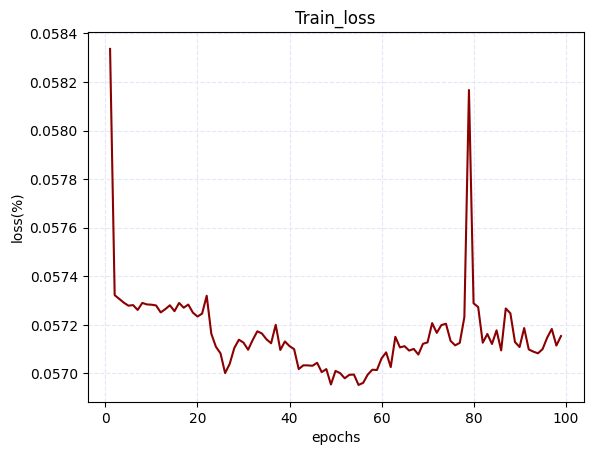

In [1125]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(x,train_loss_log, label='train_loss', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('loss(%)')
plt.title('Train_loss')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

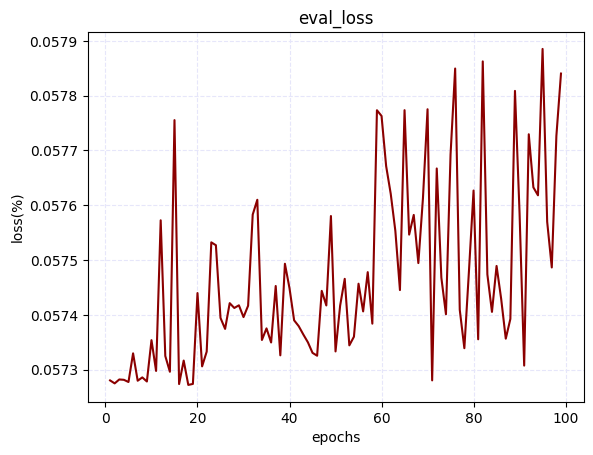

In [1126]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(x,eval_loss_log, label='eval_loss', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('loss(%)')
plt.title('eval_loss')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

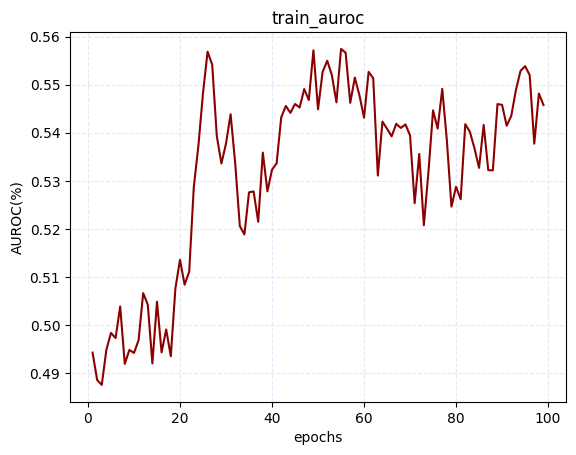

In [1127]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(x, train_auroc_log, label='train_auroc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUROC(%)')
plt.title('train_auroc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

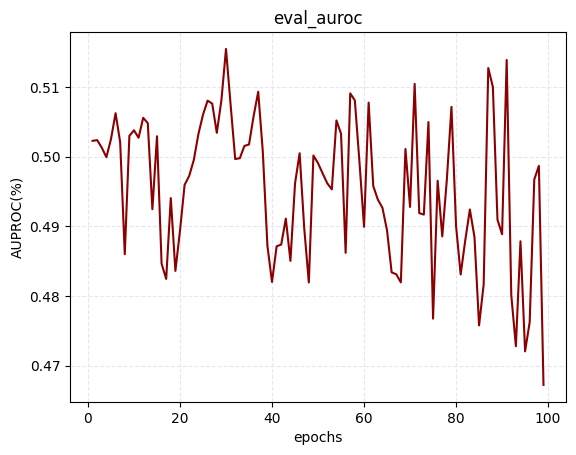

In [1128]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auroc_log, label='eval_auroc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPROC(%)')
plt.title('eval_auroc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

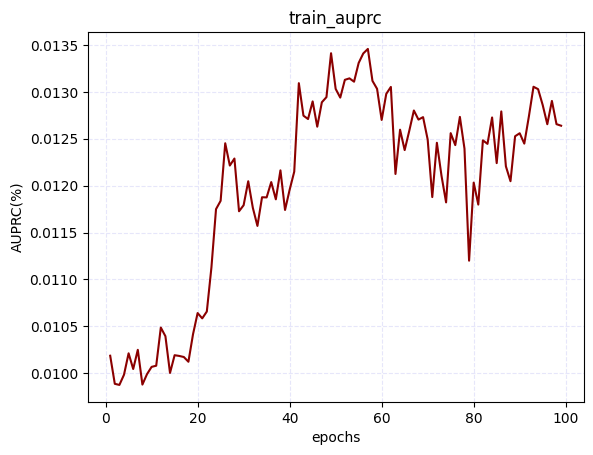

In [1129]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, train_auprc_log, label='train_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('train_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

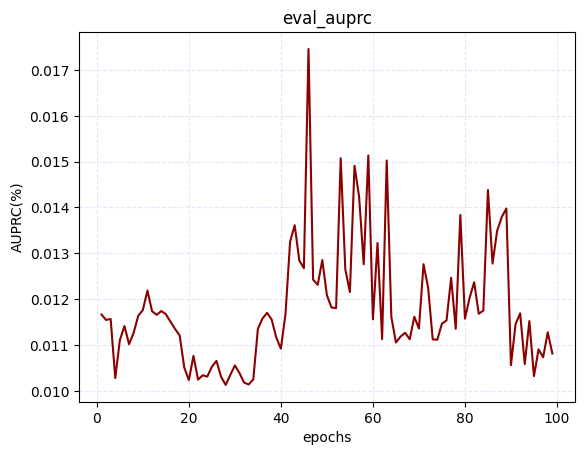

In [1130]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auprc_log, label='eval_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('eval_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

## words similarity

In [ ]:
##################################
#sample_f= group_data_sickFinal_F
#g_sample_f_idx=sample_f
#df_last=g_sample_f_idx
#from sklearn.model_selection import StratifiedShuffleSplit
#########################################


In [ ]:
# https://builtin.com/machine-learning/nlp-word2vec-python

In [ ]:
# https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial

In [457]:
from gensim.models import word2vec, FastText
import pandas as pd
import re

In [686]:
from gensim.models.phrases import Phrases, Phraser

In [687]:
df_last.columns

Index([           'ID',      ('ID', ''),     ('d', 2002),     ('d', 2003),
           ('d', 2004),     ('d', 2005),     ('d', 2006),     ('d', 2007),
           ('d', 2008),     ('d', 2009),     ('d', 2010),     ('d', 2011),
           ('d', 2012),     ('d', 2013),     ('d', 2014),          'Diag',
                   'd',  'item_year1_x',  'item_year2_x',  'item_year3_x',
        'item_year4_x',  'item_year5_x',  'item_year6_x',  'item_year7_x',
        'item_year8_x',  'item_year9_x', 'item_year10_x', 'item_year11_x',
       'item_year12_x', 'item_year13_x',   'sicks_idx_x',  'item_year1_y',
        'item_year2_y',  'item_year3_y',  'item_year4_y',  'item_year5_y',
        'item_year6_y',  'item_year7_y',  'item_year8_y',  'item_year9_y',
       'item_year10_y', 'item_year11_y', 'item_year12_y', 'item_year13_y',
         'sicks_idx_y',        'cancer',          'fold'],
      dtype='object')

In [ ]:
sent = [row.split() for row in df_clean['clean']]

In [ ]:
#import 

In [683]:
df=g_sample_f_idx

In [685]:
df.columns

Index([           'ID',      ('ID', ''),     ('d', 2002),     ('d', 2003),
           ('d', 2004),     ('d', 2005),     ('d', 2006),     ('d', 2007),
           ('d', 2008),     ('d', 2009),     ('d', 2010),     ('d', 2011),
           ('d', 2012),     ('d', 2013),     ('d', 2014),          'Diag',
                   'd',  'item_year1_x',  'item_year2_x',  'item_year3_x',
        'item_year4_x',  'item_year5_x',  'item_year6_x',  'item_year7_x',
        'item_year8_x',  'item_year9_x', 'item_year10_x', 'item_year11_x',
       'item_year12_x', 'item_year13_x',   'sicks_idx_x',  'item_year1_y',
        'item_year2_y',  'item_year3_y',  'item_year4_y',  'item_year5_y',
        'item_year6_y',  'item_year7_y',  'item_year8_y',  'item_year9_y',
       'item_year10_y', 'item_year11_y', 'item_year12_y', 'item_year13_y',
         'sicks_idx_y',        'cancer',          'fold'],
      dtype='object')

In [1]:
#df['sicks_idx_y'][0]

In [688]:
#sent = [row.split() for row in df['sicks_idx_y']]

AttributeError: 'list' object has no attribute 'split'

In [490]:
# 1. with patietns having more than 5 disease in a year: go to the part then end : similarity
print(len(g_id))
#year_cnt_T20_o10=year_cnt2[year_cnt2['ID'].isin(g_id)]

6807


In [491]:
# 1. with patietns having more than 9 disease in a year
# g_id: over10
print(len(g_id))
df_over5=df[df['ID'].isin(g_id)]

6807


In [493]:
sampl_mlm_over5=sample_final_mlm2[sample_final_mlm2['ID'].isin(g_id)]

In [495]:
sampl_mlm_over5['SICK_1Y_10Y'].head()

4     136, 'SEP',136, 'SEP',134, 136, 222, 'SEP',136...
13    145, 'SEP',136, 'SEP',133, 136, 220, 'SEP',147...
15    145, 152, 157, 'SEP',145, 147, 219, 'SEP',145,...
19    147, 202, 220, 'SEP',147, 'SEP',220, 'SEP',147...
23    202, 'SEP',202, 'SEP',202, 'SEP',143, 202, 'SE...
Name: SICK_1Y_10Y, dtype: object

In [496]:
sampl_mlm_over5.to_csv(r'out_T20_sampl_mlm_over5.csv')

In [ ]:
# Put the results in a DataFrame to remove missing values and duplicates

In [ ]:
#########################################333
### need to remove the below


In [ ]:
#https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1

### BEHRT
##### https://github.com/yikuanli/BEHRT/commit/061b740117f2ae2ff0beabcff99b19bb73f745a8


In [1]:
import pickle

with open('T20_out_group_data_sickFinal_F3_all.pickle', 'rb') as f:
    group_data_sickFinal_F3_all= pickle.load(f)

In [ ]:
#dataLoader/utils.py

In [237]:
import random


def code2index(tokens, token2idx, mask_token=None):
    output_tokens = []
    for i, token in enumerate(tokens):
        if token==mask_token:
            output_tokens.append(token2idx['UNK'])
        else:
            output_tokens.append(token2idx.get(token, token2idx['UNK']))
    return tokens, output_tokens


def random_mask(tokens, token2idx):
    output_label = []
    output_token = []
    for i, token in enumerate(tokens):
        prob = random.random()
        # mask token with 15% probability
        if prob < 0.15:
            prob /= 0.15

            # 80% randomly change token to mask token
            if prob < 0.8:
                output_token.append(token2idx["MASK"])

            # 10% randomly change token to random token
            elif prob < 0.9:
                output_token.append(random.choice(list(token2idx.values())))

            # -> rest 10% randomly keep current token

            # append current token to output (we will predict these later
            output_label.append(token2idx.get(token, token2idx['UNK']))
        else:
            # no masking token (will be ignored by loss function later)
            output_label.append(-1)
            output_token.append(token2idx.get(token, token2idx['UNK']))

    return tokens, output_token, output_label


def index_seg(tokens, symbol='SEP'):
    flag = 0
    seg = []

    for token in tokens:
        if token == symbol:
            seg.append(flag)
            if flag == 0:
                flag = 1
            else:
                flag = 0
        else:
            seg.append(flag)
    return seg


def position_idx(tokens, symbol='SEP'):
    pos = []
    flag = 0

    for token in tokens:
        if token == symbol:
            pos.append(flag)
            flag += 1
        else:
            pos.append(flag)
    return pos


def seq_padding(tokens, max_len, token2idx=None, symbol=None, unkown=True):
    if symbol is None:
        symbol = 'PAD'

    seq = []
    token_len = len(tokens)
    for i in range(max_len):
        if token2idx is None:
            if i < token_len:
                seq.append(tokens[i])
            else:
                seq.append(symbol)
        else:
            if i < token_len:
                # 1 indicate UNK
                if unkown:
                    seq.append(token2idx.get(tokens[i], token2idx['UNK']))
                else:
                    seq.append(token2idx.get(tokens[i]))
            else:
                seq.append(token2idx.get(symbol))
    return seq

In [ ]:
#dataLoader/MLM.py

In [238]:
from torch.utils.data.dataset import Dataset
import numpy as np
#from dataLoader.utils import seq_padding,position_idx,index_seg,random_mask
import torch


class MLMLoader(Dataset):
    def __init__(self, dataframe, token2idx, age2idx, max_len, code='code', age='age'):
        self.vocab = token2idx
        self.max_len = max_len
        self.code = dataframe[code]
        self.age = dataframe[age]
        self.age2idx = age2idx

    def __getitem__(self, index):
        """
        return: age, code, position, segmentation, mask, label
        """

        # extract data
        age = self.age[index][(-self.max_len+1):]
        code = self.code[index][(-self.max_len+1):]

        # avoid data cut with first element to be 'SEP'
        if code[0] != 'SEP':
            code = np.append(np.array(['CLS']), code)
            age = np.append(np.array(age[0]), age)
        else:
            code[0] = 'CLS'

        # mask 0:len(code) to 1, padding to be 0
        mask = np.ones(self.max_len)
        mask[len(code):] = 0

        # pad age sequence and code sequence
        age = seq_padding(age, self.max_len, token2idx=self.age2idx)

        tokens, code, label = random_mask(code, self.vocab)

        # get position code and segment code
        tokens = seq_padding(tokens, self.max_len)
        position = position_idx(tokens)
        segment = index_seg(tokens)

        # pad code and label
        code = seq_padding(code, self.max_len, symbol=self.vocab['PAD'])
        label = seq_padding(label, self.max_len, symbol=-1)

        return torch.LongTensor(age), torch.LongTensor(code), torch.LongTensor(position), torch.LongTensor(segment), \
               torch.LongTensor(mask), torch.LongTensor(label)

    def __len__(self):
        return len(self.code)

In [239]:
# without age 1. MLM loader
from torch.utils.data.dataset import Dataset
import numpy as np
#from dataLoader.utils import seq_padding,position_idx,index_seg,random_mask
import torch


class MLMLoader(Dataset):
    def __init__(self, dataframe, token2idx, max_len, code='code'):
        self.vocab = token2idx
        self.max_len = max_len
        self.code = dataframe[code]
        #self.age = dataframe[age]
        #self.age2idx = age2idx

    def __getitem__(self, index):
        """
        return: age, code, position, segmentation, mask, label
        """

        # extract data
        #age = self.age[index][(-self.max_len+1):]
        code = self.code[index][(-self.max_len+1):]

        # avoid data cut with first element to be 'SEP'
        if code[0] != 'SEP':
            code = np.append(np.array(['CLS']), code)
            #age = np.append(np.array(age[0]), age)
        else:
            code[0] = 'CLS'

        # mask 0:len(code) to 1, padding to be 0
        mask = np.ones(self.max_len)
        mask[len(code):] = 0

        # pad age sequence and code sequence
        #age = seq_padding(age, self.max_len, token2idx=self.age2idx)

        tokens, code, label = random_mask(code, self.vocab)

        # get position code and segment code
        tokens = seq_padding(tokens, self.max_len)
        position = position_idx(tokens)
        segment = index_seg(tokens)

        # pad code and label
        code = seq_padding(code, self.max_len, symbol=self.vocab['PAD'])
        label = seq_padding(label, self.max_len, symbol=-1)

        return torch.LongTensor(age), torch.LongTensor(code), torch.LongTensor(position), torch.LongTensor(segment), \
               torch.LongTensor(mask), torch.LongTensor(label)

    def __len__(self):
        return len(self.code)

In [ ]:
# model/utils.py

In [240]:
def age_vocab(max_age, mon=1, symbol=None):
    age2idx = {}
    idx2age = {}
    if symbol is None:
        symbol = ['PAD', 'UNK']

    for i in range(len(symbol)):
        age2idx[str(symbol[i])] = i
        idx2age[i] = str(symbol[i])

    if mon == 12:
        for i in range(max_age):
            age2idx[str(i)] = len(symbol) + i
            idx2age[len(symbol) + i] = str(i)
    elif mon == 1:
        for i in range(max_age * 12):
            age2idx[str(i)] = len(symbol) + i
            idx2age[len(symbol) + i] = str(i)
    else:
        age2idx = None
        idx2age = None
    return age2idx, idx2age

In [ ]:
#model/MLM.py
#!pip install pytorch-pretrained-bert

In [241]:
import torch
from pytorch_pretrained_bert import BertTokenizer, BertModel
#from pytorch_transofmers import BertTokenizer, BertModel
import pandas as pd
import numpy as np
#from transformers import BertTokenizer, BertForPreTraining
#import torch

#tokenizer =BertTokenizer.from_pretrained('bert-base-uncased')
#model =BertForPreTraining.from_pretrained('bert-base-uncased')

In [ ]:
# common/pytorch.py

In [242]:
import torch


def save_model(path, model):
    # Save a trained model
    print("** ** * Saving fine - tuned model ** ** * ")
    model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
    output_model_file = path
    torch.save(model_to_save.state_dict(), output_model_file)


def load_model(path, model):
    # load pretrained model and update weights
    pretrained_dict = torch.load(path, map_location='cpu')
    model_dict = model.state_dict()
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict)
    # 3. load the new state dict
    model.load_state_dict(model_dict)
    return model

In [ ]:
#model/MLM.py

In [243]:
import torch.nn as nn
import pytorch_pretrained_bert as Bert
import numpy as np
import torch

class BertEmbeddings(nn.Module):
    """Construct the embeddings from word, segment, age
    """

    def __init__(self, config):
        super(BertEmbeddings, self).__init__()
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)
        self.segment_embeddings = nn.Embedding(config.seg_vocab_size, config.hidden_size)
        self.age_embeddings = nn.Embedding(config.age_vocab_size, config.hidden_size)
        self.posi_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size). \
            from_pretrained(embeddings=self._init_posi_embedding(config.max_position_embeddings, config.hidden_size))

        self.LayerNorm = Bert.modeling.BertLayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, word_ids, age_ids=None, seg_ids=None, posi_ids=None, age=True):
        if seg_ids is None:
            seg_ids = torch.zeros_like(word_ids)
        if age_ids is None:
            age_ids = torch.zeros_like(word_ids)
        if posi_ids is None:
            posi_ids = torch.zeros_like(word_ids)

        word_embed = self.word_embeddings(word_ids)
        segment_embed = self.segment_embeddings(seg_ids)
        age_embed = self.age_embeddings(age_ids)
        posi_embeddings = self.posi_embeddings(posi_ids)

        if age:
            embeddings = word_embed + segment_embed + age_embed + posi_embeddings
        else:
            embeddings = word_embed + segment_embed + posi_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

    def _init_posi_embedding(self, max_position_embedding, hidden_size):
        def even_code(pos, idx):
            return np.sin(pos / (10000 ** (2 * idx / hidden_size)))

        def odd_code(pos, idx):
            return np.cos(pos / (10000 ** (2 * idx / hidden_size)))

        # initialize position embedding table
        lookup_table = np.zeros((max_position_embedding, hidden_size), dtype=np.float32)

        # reset table parameters with hard encoding
        # set even dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(0, hidden_size, step=2):
                lookup_table[pos, idx] = even_code(pos, idx)
        # set odd dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(1, hidden_size, step=2):
                lookup_table[pos, idx] = odd_code(pos, idx)

        return torch.tensor(lookup_table)


class BertModel(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config):
        super(BertModel, self).__init__(config)
        self.embeddings = BertEmbeddings(config=config)
        self.encoder = Bert.modeling.BertEncoder(config=config)
        self.pooler = Bert.modeling.BertPooler(config)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, age_ids=None, seg_ids=None, posi_ids=None, attention_mask=None,
                output_all_encoded_layers=True):
        if attention_mask is None:
            attention_mask = torch.ones_like(input_ids)
        if age_ids is None:
            age_ids = torch.zeros_like(input_ids)
        if seg_ids is None:
            seg_ids = torch.zeros_like(input_ids)
        if posi_ids is None:
            posi_ids = torch.zeros_like(input_ids)

        # We create a 3D attention mask from a 2D tensor mask.
        # Sizes are [batch_size, 1, 1, to_seq_length]
        # So we can broadcast to [batch_size, num_heads, from_seq_length, to_seq_length]
        # this attention mask is more simple than the triangular masking of causal attention
        # used in OpenAI GPT, we just need to prepare the broadcast dimension here.
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

        # Since attention_mask is 1.0 for positions we want to attend and 0.0 for
        # masked positions, this operation will create a tensor which is 0.0 for
        # positions we want to attend and -10000.0 for masked positions.
        # Since we are adding it to the raw scores before the softmax, this is
        # effectively the same as removing these entirely.
        extended_attention_mask = extended_attention_mask.to(dtype=next(self.parameters()).dtype)  # fp16 compatibility
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        embedding_output = self.embeddings(input_ids, age_ids, seg_ids, posi_ids)
        encoded_layers = self.encoder(embedding_output,
                                      extended_attention_mask,
                                      output_all_encoded_layers=output_all_encoded_layers)
        sequence_output = encoded_layers[-1]
        pooled_output = self.pooler(sequence_output)
        if not output_all_encoded_layers:
            encoded_layers = encoded_layers[-1]
        return encoded_layers, pooled_output


class BertForMaskedLM(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config):
        super(BertForMaskedLM, self).__init__(config)
        self.bert = BertModel(config)
        self.cls = Bert.modeling.BertOnlyMLMHead(config, self.bert.embeddings.word_embeddings.weight)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, age_ids=None, seg_ids=None, posi_ids=None, attention_mask=None, masked_lm_labels=None):
        sequence_output, _ = self.bert(input_ids, age_ids, seg_ids, posi_ids, attention_mask,
                                       output_all_encoded_layers=False)
        prediction_scores = self.cls(sequence_output)

        if masked_lm_labels is not None:
            loss_fct = nn.CrossEntropyLoss(ignore_index=-1)
            masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size), masked_lm_labels.view(-1))
            return masked_lm_loss, prediction_scores.view(-1, self.config.vocab_size), masked_lm_labels.view(-1)
        else:
            return prediction_scores

In [ ]:
# model/optimiser.py

In [244]:
import pytorch_pretrained_bert as Bert

def adam(params, config=None):
    if config is None:
        config = {
            'lr': 3e-5,
            'warmup_proportion': 0.1,
            'weight_decay': 0.01
        }
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']

    optimizer_grouped_parameters = [
        {'params': [p for n, p in params if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in params if any(nd in n for nd in no_decay)], 'weight_decay': 0}
    ]

    optim = Bert.optimization.BertAdam(optimizer_grouped_parameters,
                                       lr=config['lr'],
                                       warmup=config['warmup_proportion'])
    return optim

In [ ]:
#

In [245]:
#from common.common import create_folder
#from common.pytorch import load_model
import pytorch_pretrained_bert as Bert
#from model.utils import age_vocab
#from common.common import load_obj
#from dataLoader.MLM import MLMLoader
#from torch.utils.data import DataLoader
import pandas as pd
#from model.MLM import BertForMaskedLM
#from model.optimiser import adam
import sklearn.metrics as skm
import numpy as np
import torch
import time
import torch.nn as nn
import os

In [246]:
class BertConfig(Bert.modeling.BertConfig):
    def __init__(self, config):
        super(BertConfig, self).__init__(
            vocab_size_or_config_json_file=config.get('vocab_size'),
            hidden_size=config['hidden_size'],
            num_hidden_layers=config.get('num_hidden_layers'),
            num_attention_heads=config.get('num_attention_heads'),
            intermediate_size=config.get('intermediate_size'),
            hidden_act=config.get('hidden_act'),
            hidden_dropout_prob=config.get('hidden_dropout_prob'),
            attention_probs_dropout_prob=config.get('attention_probs_dropout_prob'),
            max_position_embeddings = config.get('max_position_embedding'),
            initializer_range=config.get('initializer_range'),
        )
        self.seg_vocab_size = config.get('seg_vocab_size')
        self.age_vocab_size = config.get('age_vocab_size')
        
class TrainConfig(object):
    def __init__(self, config):
        self.batch_size = config.get('batch_size')
        self.use_cuda = config.get('use_cuda')
        self.max_len_seq = config.get('max_len_seq')
        self.train_loader_workers = config.get('train_loader_workers')
        self.test_loader_workers = config.get('test_loader_workers')
        self.device = config.get('device')
        self.output_dir = config.get('output_dir')
        self.output_name = config.get('output_name')
        self.best_name = config.get('best_name')

In [ ]:
#BertVocab = load_obj(file_config['vocab'])
#ageVocab, _ = age_vocab(max_age=global_params['max_age'], mon=global_params['month'], symbol=global_params['age_symbol'])

In [ ]:
#file_config = {
    'vocab':'',  # vocabulary idx2token, token2idx
    'data': '',  # formated data 
    'model_path': '', # where to save model
    'model_name': '', # model name
    'file_name': '',  # log path
# }
# create_folder(file_config['model_path'])

In [ ]:
global_params = {
    'max_seq_len': 64,
    'max_age': 110,
    'month': 1,
    'age_symbol': None,
    'min_visit': 5,
    'gradient_accumulation_steps': 1
}

optim_param = {
    'lr': 3e-5,
    'warmup_proportion': 0.1,
    'weight_decay': 0.01
}

train_params = {
    'batch_size': 256,
    'use_cuda': True,
    'max_len_seq': global_params['max_seq_len'],
    'device': 'cuda:0'
}

In [ ]:
BertVocab = load_obj(file_config['vocab'])
ageVocab, _ = age_vocab(max_age=global_params['max_age'], mon=global_params['month'], symbol=global_params['age_symbol'])

In [ ]:
data = pd.read_parquet(file_config['data'])
# remove patients with visits less than min visit
data['length'] = data['caliber_id'].apply(lambda x: len([i for i in range(len(x)) if x[i] == 'SEP']))
data = data[data['length'] >= global_params['min_visit']]
data = data.reset_index(drop=True)

In [ ]:
####################################
### Apply ##################

####################################

In [ ]:
#group_data_mlm :  group_g1_data_sickFinal+group_g2_data_sickFinal+group_g3_data_sickFinal+group_g4_data_sickFinal (train)
# nsp : group_g5_data_sickFinal+group_g6_data_sickFinal+group_g7_data_sickFinal  (valid, test)


In [4]:
import pandas as pd

In [396]:
#import pickle

#with open('T20_out_group_data_sickFinal_F2.pickle', 'rb') as f:
#    group_data_sickFinal_F2= pickle.load(f)

In [681]:
# 1. with sampling
import pickle

with open('T20_out_group_data_sickFinal_F3.pickle', 'rb') as f:
    group_data_sickFinal_F3= pickle.load(f)

In [ ]:
# 2. without sampling 
import pickle

with open('T20_out_group_data_sickFinal_F3_all.pickle', 'rb') as f:
    group_data_sickFinal_F3_all= pickle.load(f)

In [927]:
group_data_sickFinal_F3.fold.value_counts()

0    5671
1    1457
Name: fold, dtype: int64

In [13]:
group_data_sickFinal_F3_all.fold.value_counts()

0    183888
1     45958
Name: fold, dtype: int64

In [940]:
group_data_sickFinal_F3.fold2.value_counts()

0    4214
1    2914
Name: fold2, dtype: int64

In [14]:
group_data_sickFinal_F3_all.fold2.value_counts()

0    137763
1     92083
Name: fold2, dtype: int64

In [ ]:
# with r sampling
group_data_sickFinal=pd.DataFrame(group_data_sickFinal_F3).reset_index()
#group_data_sickFinal_mlm=pd.DataFrame(group_data_sickFinal_F2[group_data_sickFinal_F2.fold==0]).reset_index()

In [15]:
#without r sampling
group_data_sickFinal=pd.DataFrame(group_data_sickFinal_F3_all).reset_index()

In [40]:
g_data=group_data_sickFinal

In [41]:
#mlm and ndp
g_data['fold3']=0

print('about 40% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.')
test_index3 = (g_data['ID'].astype(str).map(lambda x : x[-1]) == '3') |(g_data['ID'].astype(str).map(lambda x : x[-1]) == '5') |(g_data['ID'].astype(str).map(lambda x : x[-1]) == '7') |(g_data['ID'].astype(str).map(lambda x : x[-1]) == '9')

g_data.loc[test_index3, 'fold3'] = 1

print('Fold3 0 -> MLM set  Fold3 1 -> NDP set')
print(g_data['fold3'].value_counts())

about 40% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.
Fold3 0 -> MLM set  Fold3 1 -> NDP set
0    137961
1     91885
Name: fold3, dtype: int64


In [42]:
g_data['fold'].value_counts()

0    183888
1     45958
Name: fold, dtype: int64

In [43]:
group_data_sickFinal_mlm=pd.DataFrame(g_data[g_data['fold3']==0]).reset_index()

In [44]:
group_data_sickFinal_mlm.fold.value_counts()

0    114985
1     22976
Name: fold, dtype: int64

In [45]:
group_data_sickFinal_mlm.head()

,level_0,index,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,...,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2,fold3
0,1,1,154,0,0,0,0,0,[220],0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0
1,2,2,518,0,0,0,0,0,0,0,...,"[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,1,1,0
2,3,3,524,0,0,0,0,0,0,0,...,"[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0
3,7,7,950,"[147, 220]",[147],"[147, 220]","[147, 220]",[220],"[147, 220]",[147],...,"[44, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 64, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 44, 1, ...",NaN,1,0,0,0
4,8,8,1202,0,0,[136],"[152, 198, 219]",[219],"[197, 219]","[133, 147, 219]",...,"[77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0


In [ ]:
####
###Embedding for data : 
#### 1. Disease embeding : add element 'SEP'

In [46]:
group_data_sickFinal_mlm.columns

Index(['level_0', 'index', 'ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y',
       'd_6Y', 'd_7Y', 'd_8Y', 'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y',
       'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y',
       'age_8Y', 'age_9Y', 'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag',
       'Diag_d', 'item_year1', 'item_year2', 'item_year3', 'item_year4',
       'item_year5', 'item_year6', 'item_year7', 'item_year8', 'item_year9',
       'item_year10', 'item_year11', 'item_year12', 'item_year13', 'sicks_idx',
       'ID2', 'cancer', 'fold', 'fold2', 'fold3'],
      dtype='object')

In [47]:
group_data_sickFinal_mlm.head()

,level_0,index,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,...,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2,fold3
0,1,1,154,0,0,0,0,0,[220],0,...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0
1,2,2,518,0,0,0,0,0,0,0,...,"[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,1,1,0
2,3,3,524,0,0,0,0,0,0,0,...,"[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0
3,7,7,950,"[147, 220]",[147],"[147, 220]","[147, 220]",[220],"[147, 220]",[147],...,"[44, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 64, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 44, 1, ...",NaN,1,0,0,0
4,8,8,1202,0,0,[136],"[152, 198, 219]",[219],"[197, 219]","[133, 147, 219]",...,"[77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[42, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,0,0,0


In [48]:
group_data_sickFinal_mlm['item_year13'][0]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [49]:
#group_data_sickFinal_mlm['sicks_idx'][0]

In [50]:
# selecting patients having at least for the last  3 years' sick codes  :group_data_sickF_mlm : 10 years for MLM from columns[2] to columns[11]
f2=group_data_sickFinal_mlm
f2=f2.drop(columns=['level_0'])
# g_f2 = f2[(f2[f2.columns[2]]!= None)&(f2[f2.columns[2]]!= 0)  & (f2[f2.columns[3]]!= None)&(f2[f2.columns[3]]!= 0) \
# & (f2[f2.columns[4]]!= None) & (f2[f2.columns[4]]!= 0) & (f2[f2.columns[5]]!= None) &(f2[f2.columns[5]]!= 0) \
# & (f2[f2.columns[6]]!= None) & (f2[f2.columns[6]]!= 0) & (f2[f2.columns[7]]!= None) &(f2[f2.columns[7]]!= 0) \
# & (f2[f2.columns[8]]!= None) & (f2[f2.columns[8]]!= 0) & (f2[f2.columns[9]]!= None) &(f2[f2.columns[9]]!= 0) \
# & (f2[f2.columns[10]]!= None) & (f2[f2.columns[10]]!= 0) & (f2[f2.columns[11]]!= None) &(f2[f2.columns[11]]!= 0)]

g_f2 = f2[(f2[f2.columns[11]]!= None) &(f2[f2.columns[11]]!= 0) \
& (f2[f2.columns[12]]!= None) & (f2[f2.columns[12]]!= 0) & (f2[f2.columns[13]]!= None) &(f2[f2.columns[13]]!= 0)]
#g_f2=f2
group_data_sickFinal_mlm2=pd.DataFrame(g_f2).reset_index()

In [51]:
group_data_sickFinal_mlm2.head()

,level_0,index,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,...,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2,fold3
0,1,2,518,0,0,0,0,0,0,0,...,"[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,1,1,0
1,3,7,950,"[147, 220]",[147],"[147, 220]","[147, 220]",[220],"[147, 220]",[147],...,"[44, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 64, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 44, 1, ...",NaN,1,0,0,0
2,5,10,1376,[202],0,0,0,0,0,"[220, 231]",...,"[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[71, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",NaN,1,0,1,0
3,11,22,3796,[102],"[195, 197]","[195, 235]","[162, 195, 238]","[168, 195, 238]",[195],"[145, 197]",...,"[32, 42, 71, 94, 1, 1, 1, 1, 1, 1, 1, 1]","[32, 57, 77, 91, 94, 1, 1, 1, 1, 1, 1, 1]","[32, 42, 48, 77, 91, 94, 1, 1, 1, 1, 1, 1]","[32, 42, 77, 91, 95, 1, 1, 1, 1, 1, 1, 1]","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 64, 66, 1...",NaN,0,0,1,0
4,19,34,5596,[151],0,0,0,0,0,[152],...,"[48, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",NaN,1,0,1,0


In [52]:
def add_sep_0(test):
    for i in range(0, len(test)) :
        if test['d_1Y'][i] !=0:
            test['d_1Y'][i].extend(['SEP'])
        else :  test['d_1Y'][i] = ['SEP']
        if test['d_2Y'][i] !=0:
            test['d_2Y'][i].extend(['SEP'])
        else :  test['d_2Y'][i] = ['SEP']
        if test['d_3Y'][i] !=0:
            test['d_3Y'][i].extend(['SEP'])
        else :  test['d_3Y'][i] = ['SEP']
        if test['d_4Y'][i] !=0:
            test['d_4Y'][i].extend(['SEP'])
        else :  test['d_4Y'][i] = ['SEP']
        if test['d_5Y'][i] !=0:
            test['d_5Y'][i].extend(['SEP'])
        else :  test['d_5Y'][i] = ['SEP']
        if test['d_6Y'][i] !=0:
            test['d_6Y'][i].extend(['SEP'])
        else :  test['d_6Y'][i] = ['SEP']
        if test['d_7Y'][i] !=0:
            test['d_7Y'][i].extend(['SEP'])
        else :  test['d_7Y'][i] = ['SEP']
        if test['d_8Y'][i] !=0:
            test['d_8Y'][i].extend(['SEP'])
        else :  test['d_8Y'][i] = ['SEP']
        if test['d_9Y'][i] !=0:
            test['d_9Y'][i].extend(['SEP'])
        else :  test['d_9Y'][i] = ['SEP']
        if test['d_10Y'][i] !=0:
            test['d_10Y'][i].extend(['SEP'])
        else :  test['d_10Y'][i] = ['SEP']
        if test['d_11Y'][i] !=0:
            test['d_11Y'][i].extend(['SEP'])
        if test['d_12Y'][i] !=0:
            test['d_12Y'][i].extend(['SEP'])
        if test['d_13Y'][i] !=0:
            test['d_13Y'][i].extend(['SEP'])
    return test

In [53]:
### MLM : 
#group_data_sickF_mlm_0 = add_sep_0(group_data_sickFinal_mlm) 
group_data_sickF_mlm_0 = add_sep_0(group_data_sickFinal_mlm2)

/tmp/ipykernel_19676/1351822066.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else :  test['d_1Y'][i] = ['SEP']
/tmp/ipykernel_19676/1351822066.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else :  test['d_2Y'][i] = ['SEP']
/tmp/ipykernel_19676/1351822066.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  else :  test['d_3Y'][i] = ['SEP']
/tmp/ipykernel_19676/1351822066.py:14: SettingWithCopyWarning: 
A value is trying to

In [54]:
def add_sep(test):
    for i in range(0, len(test)) :
        if test['d_1Y'][i] !=0:
            test['d_1Y'][i].extend(['SEP'])
        if test['d_2Y'][i] !=0:
            test['d_2Y'][i].extend(['SEP'])
        if test['d_3Y'][i] !=0:
            test['d_3Y'][i].extend(['SEP'])
        if test['d_4Y'][i] !=0:
            test['d_4Y'][i].extend(['SEP'])
        if test['d_5Y'][i] !=0:
            test['d_5Y'][i].extend(['SEP'])
        if test['d_6Y'][i] !=0:
            test['d_6Y'][i].extend(['SEP'])
        if test['d_7Y'][i] !=0:
            test['d_7Y'][i].extend(['SEP'])
        if test['d_8Y'][i] !=0:
            test['d_8Y'][i].extend(['SEP'])
        if test['d_9Y'][i] !=0:
            test['d_9Y'][i].extend(['SEP'])
        if test['d_10Y'][i] !=0:
            test['d_10Y'][i].extend(['SEP'])
        if test['d_11Y'][i] !=0:
            test['d_11Y'][i].extend(['SEP'])
        if test['d_12Y'][i] !=0:
            test['d_12Y'][i].extend(['SEP'])
        if test['d_13Y'][i] !=0:
            test['d_13Y'][i].extend(['SEP'])
    return test

In [443]:
### MLM : 
#group_data_sickF_mlm = add_sep(group_data_sickFinal_mlm) 
#group_data_sickF_mlm2 = add_sep(group_data_sickFinal_mlm2) 

In [55]:
group_data_sickF_mlm_0.head(5)

,level_0,index,ID,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,...,item_year10,item_year11,item_year12,item_year13,sicks_idx,ID2,cancer,fold,fold2,fold3
0,1,2,518,[SEP],[SEP],[SEP],[SEP],[SEP],[SEP],[SEP],...,"[64, 77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",NaN,1,1,1,0
1,3,7,950,"[147, 220, SEP]","[147, SEP]","[147, 220, SEP]","[147, 220, SEP]","[220, SEP]","[147, 220, SEP]","[147, SEP]",...,"[44, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 64, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[44, 78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 44, 1, ...",NaN,1,0,0,0
2,5,10,1376,"[202, SEP]",[SEP],[SEP],[SEP],[SEP],[SEP],"[220, 231, SEP]",...,"[46, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[78, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[77, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[71, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",NaN,1,0,1,0
3,11,22,3796,"[102, SEP]","[195, 197, SEP]","[195, 235, SEP]","[162, 195, 238, SEP]","[168, 195, 238, SEP]","[195, SEP]","[145, 197, SEP]",...,"[32, 42, 71, 94, 1, 1, 1, 1, 1, 1, 1, 1]","[32, 57, 77, 91, 94, 1, 1, 1, 1, 1, 1, 1]","[32, 42, 48, 77, 91, 94, 1, 1, 1, 1, 1, 1]","[32, 42, 77, 91, 95, 1, 1, 1, 1, 1, 1, 1]","[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 64, 66, 1...",NaN,0,0,1,0
4,19,34,5596,"[151, SEP]",[SEP],[SEP],[SEP],[SEP],[SEP],"[152, SEP]",...,"[48, 64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[64, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[47, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",NaN,1,0,1,0


In [56]:
group_data_sickF_mlm_0.columns

Index(['level_0', 'index', 'ID', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y',
       'd_6Y', 'd_7Y', 'd_8Y', 'd_9Y', 'd_10Y', 'd_11Y', 'd_12Y', 'd_13Y',
       'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y', 'age_6Y', 'age_7Y',
       'age_8Y', 'age_9Y', 'age_10Y', 'age_11Y', 'age_12Y', 'age_13Y', 'Diag',
       'Diag_d', 'item_year1', 'item_year2', 'item_year3', 'item_year4',
       'item_year5', 'item_year6', 'item_year7', 'item_year8', 'item_year9',
       'item_year10', 'item_year11', 'item_year12', 'item_year13', 'sicks_idx',
       'ID2', 'cancer', 'fold', 'fold2', 'fold3'],
      dtype='object')

In [57]:
group_data_sickF_mlm_0.cancer.value_counts()

0    49747
1      524
Name: cancer, dtype: int64

In [ ]:
#################################
##################Prat V. BEHRT

In [171]:
# 1. Dictionary

import pickle

with open('vocab2.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab2 = pickle.load(f)


import pickle

with open('vocab1.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab1 = pickle.load(f)

## create word dictionary
word_dict = {'PAD': 0, 'CLS': 1, 'SEP': 2, 'MASK': 3, 'UNK' :4 }
for i, w in enumerate(vocab2):
   word_dict[w] = i + 4
   number_dict = {i: w for i, w in enumerate(word_dict)}
   vocab_size = len(word_dict)

len(word_dict)

103

In [334]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# import :
import pickle
#sample_final_mlm2
with open('sample_final_mlm_option1.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_mlm2 = pd.DataFrame(data)


# sample_final_nsp3
with open('sample_final_nsp_option1.pkl', 'rb') as f:
    data = pickle.load(f)
sample_final_nsp3 = pd.DataFrame(data)

In [ ]:
# data 1 for MLM : group_data_sickF_mlm 

In [ ]:
## BEHRT :https://github.com/yikuanli/BEHRT/commit/061b740117f2ae2ff0beabcff99b19bb73f745a8#diff-0df601dfc8606d12f258481fc46320c1a5321bd8b7a1177aaee19f634d13d2b9

In [ ]:
# https://github.com/deepmedicine/BEHRT/blob/master/task/MLM.ipynb

Restart


In [86]:
# 1. Dictionary

import pickle

with open('vocab2.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab2 = pickle.load(f)


import pickle

with open('vocab1.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab1 = pickle.load(f)

## create word dictionary
word_dict = {'PAD': 0, 'CLS': 1, 'SEP': 2, 'MASK': 3, 'UNK' :4 }
for i, w in enumerate(vocab2):
   word_dict[w] = i + 4
   number_dict = {i: w for i, w in enumerate(word_dict)}
   vocab_size = len(word_dict)

len(word_dict)

103

In [335]:
sample_final_mlm2.columns

Index(['index', 'ID', 'ID2', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y',
       'd_7Y', 'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y',
       'age_6Y', 'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y',
       'gen_5Y', 'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'cancer',
       'fold', 'fold2', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [336]:
sample_final_nsp3.columns

Index(['index', 'ID', 'ID2', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y',
       'd_7Y', 'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y',
       'age_6Y', 'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y',
       'gen_5Y', 'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'cancer',
       'fold', 'fold2', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [337]:
# utils.py 
import random


def code2index(tokens, token2idx, mask_token=None):
    output_tokens = []
    for i, token in enumerate(tokens):
        if token==mask_token:
            output_tokens.append(token2idx['UNK'])
        else:
            output_tokens.append(token2idx.get(token, token2idx['UNK']))
    return tokens, output_tokens


def random_mask(tokens, token2idx):
    output_label = []
    output_token = []
    for i, token in enumerate(tokens):
        prob = random.random()
        # mask token with 15% probability
        if prob < 0.15:
            prob /= 0.15

            # 80% randomly change token to mask token
            if prob < 0.8:
                output_token.append(token2idx["MASK"])

            # 10% randomly change token to random token
            elif prob < 0.9:
                output_token.append(random.choice(list(token2idx.values())))

            # -> rest 10% randomly keep current token

            # append current token to output (we will predict these later
            output_label.append(token2idx.get(token, token2idx['UNK']))
        else:
            # no masking token (will be ignored by loss function later)
            output_label.append(-1)
            output_token.append(token2idx.get(token, token2idx['UNK']))

    return tokens, output_token, output_label


def index_seg(tokens, symbol='SEP'):
    flag = 0
    seg = []

    for token in tokens:
        if token == symbol:
            seg.append(flag)
            if flag == 0:
                flag = 1
            else:
                flag = 0
        else:
            seg.append(flag)
    return seg


def position_idx(tokens, symbol='SEP'):
    pos = []
    flag = 0

    for token in tokens:
        if token == symbol:
            pos.append(flag)
            flag += 1
        else:
            pos.append(flag)
    return pos


def seq_padding(tokens, max_len, token2idx=None, symbol=None, unkown=True):
    if symbol is None:
        symbol = 'PAD'

    seq = []
    token_len = len(tokens)
    for i in range(max_len):
        if token2idx is None:
            if i < token_len:
                seq.append(tokens[i])
            else:
                seq.append(symbol)
        else:
            if i < token_len:
                # 1 indicate UNK
                if unkown:
                    seq.append(token2idx.get(tokens[i], token2idx['UNK']))
                else:
                    seq.append(token2idx.get(tokens[i]))
            else:
                seq.append(token2idx.get(symbol))
    return seq

In [338]:
import torch


def save_model(path, model):
    # Save a trained model
    print("** ** * Saving fine - tuned model ** ** * ")
    model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
    output_model_file = path
    torch.save(model_to_save.state_dict(), output_model_file)


def load_model(path, model):
    # load pretrained model and update weights
    pretrained_dict = torch.load(path, map_location='cpu')
    model_dict = model.state_dict()
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict)
    # 3. load the new state dict
    model.load_state_dict(model_dict)
    return model


In [341]:
import os
import _pickle as pickle
##import h5py


def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)


def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)


def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [340]:
import os
os.getcwd()

'/home/skbae/cancer_conquerance'

In [209]:
# file_config = {
#     #'vocab':'',  # vocabulary idx2token, token2idx
#     #'data': '',  # formated data 
#     'model_path': os.getcwd(), #'/home/skbae/Documents/cancer_Conquest/model', # where to save model
#     'model_name': 'm1_T20_new2_option1', # model name
#     'file_name': 'log_T20_new2_option1',  # log path
# }
# create_folder(file_config['model_path'])

In [342]:
file_config = {
    #'vocab':'',  # vocabulary idx2token, token2idx
    #'data': '',  # formated data 
    'model_path': os.getcwd(), #'/home/skbae/Documents/cancer_Conquest/model', # where to save model
    'model_name': 'm1_T20_new2_option2', # model name
    'file_name': 'log_T20_new2_option2',  # log path
}
create_folder(file_config['model_path'])

In [343]:
import random


def code2index(tokens, token2idx, mask_token=None):
    output_tokens = []
    for i, token in enumerate(tokens):
        if token==mask_token:
            output_tokens.append(token2idx['UNK'])
        else:
            output_tokens.append(token2idx.get(token, token2idx['UNK']))
    return tokens, output_tokens


def random_mask(tokens, token2idx):
    output_label = []
    output_token = []
    for i, token in enumerate(tokens):
        prob = random.random()
        # mask token with 15% probability
        if prob < 0.15:
            prob /= 0.15

            # 80% randomly change token to mask token
            if prob < 0.8:
                output_token.append(token2idx["MASK"])

            # 10% randomly change token to random token
            elif prob < 0.9:
                output_token.append(random.choice(list(token2idx.values())))

            # -> rest 10% randomly keep current token

            # append current token to output (we will predict these later
            output_label.append(token2idx.get(token, token2idx['UNK']))
        else:
            # no masking token (will be ignored by loss function later)
            output_label.append(-1)
            output_token.append(token2idx.get(token, token2idx['UNK']))

    return tokens, output_token, output_label


def index_seg(tokens, symbol='SEP'):
    flag = 0
    seg = []

    for token in tokens:
        if token == symbol:
            seg.append(flag)
            if flag == 0:
                flag = 1
            else:
                flag = 0
        else:
            seg.append(flag)
    return seg


def position_idx(tokens, symbol='SEP'):
    pos = []
    flag = 0

    for token in tokens:
        if token == symbol:
            pos.append(flag)
            flag += 1
        else:
            pos.append(flag)
    return pos


def seq_padding(tokens, max_len, token2idx=None, symbol=None, unkown=True):
    if symbol is None:
        symbol = 'PAD'

    seq = []
    token_len = len(tokens)
    for i in range(max_len):
        if token2idx is None:
            if i < token_len:
                seq.append(tokens[i])
            else:
                seq.append(symbol)
        else:
            if i < token_len:
                # 1 indicate UNK
                if unkown:
                    seq.append(token2idx.get(tokens[i], token2idx['UNK']))
                else:
                    seq.append(token2idx.get(tokens[i]))
            else:
                seq.append(token2idx.get(symbol))
    return seq


In [211]:
#'disease_sequence2', 'age_sequence'

In [345]:
from torch.utils.data.dataset import Dataset
import numpy as np
#from dataLoader.utils import seq_padding,position_idx,index_seg,random_mask
import torch
#qqqqq

class MLMLoader(Dataset):
    def __init__(self, dataframe, token2idx, age2idx, max_len, code='code', age='age'):
        self.vocab = token2idx
        self.max_len = max_len
        self.code = dataframe['disease_sequence2'] #dataframe[code] ,sample_final['age_1Y_5Y'] 
        self.age = dataframe['age_sequence'] # dataframe[age]
        self.age2idx = age2idx

    def __getitem__(self, index):
        """
        return: age, code, position, segmentation, mask, label
        """

        # extract data
        age = self.age[index][(-self.max_len+1):]
        code = self.code[index][(-self.max_len+1):]

        # avoid data cut with first element to be 'SEP'
        if code[0] != 'SEP':
            code = np.append(np.array(['CLS']), code)
            age = np.append(np.array(age[0]), age)
        else:
            code[0] = 'CLS'

        # mask 0:len(code) to 1, padding to be 0
        mask = np.ones(self.max_len)
        mask[len(code):] = 0

        # pad age sequence and code sequence
        age = seq_padding(age, self.max_len, token2idx=self.age2idx)

        tokens, code, label = random_mask(code, self.vocab)

        # get position code and segment code
        tokens = seq_padding(tokens, self.max_len)
        position = position_idx(tokens)
        segment = index_seg(tokens)

        # pad code and label
        code = seq_padding(code, self.max_len, symbol=self.vocab['PAD'])
        label = seq_padding(label, self.max_len, symbol=-1)

        return torch.LongTensor(age), torch.LongTensor(code), torch.LongTensor(position), torch.LongTensor(segment), \
               torch.LongTensor(mask), torch.LongTensor(label)

    def __len__(self):
        return len(self.code)

In [346]:
def age_vocab(max_age, mon=1, symbol=None):
    age2idx = {}
    idx2age = {}
    if symbol is None:
        symbol = ['PAD', 'UNK']

    for i in range(len(symbol)):
        age2idx[str(symbol[i])] = i
        idx2age[i] = str(symbol[i])

    if mon == 12:
        for i in range(max_age):
            age2idx[str(i)] = len(symbol) + i
            idx2age[len(symbol) + i] = str(i)
    elif mon == 1:
        for i in range(max_age * 12):
            age2idx[str(i)] = len(symbol) + i
            idx2age[len(symbol) + i] = str(i)
    else:
        age2idx = None
        idx2age = None
    return age2idx, idx2age

In [ ]:
#! pip install pytorch-pretrained-bert

In [347]:
import torch.nn as nn
import pytorch_pretrained_bert as Bert
import numpy as np
import torch

class BertEmbeddings(nn.Module):
    """Construct the embeddings from word, segment, age
    """

    def __init__(self, config):
        super(BertEmbeddings, self).__init__()
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)
        self.segment_embeddings = nn.Embedding(config.seg_vocab_size, config.hidden_size)
        self.age_embeddings = nn.Embedding(config.age_vocab_size, config.hidden_size)
        self.posi_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size). \
            from_pretrained(embeddings=self._init_posi_embedding(config.max_position_embeddings, config.hidden_size))

        self.LayerNorm = Bert.modeling.BertLayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, word_ids, age_ids=None, seg_ids=None, posi_ids=None, age=True):
        if seg_ids is None:
            seg_ids = torch.zeros_like(word_ids)
        if age_ids is None:
            age_ids = torch.zeros_like(word_ids)
        if posi_ids is None:
            posi_ids = torch.zeros_like(word_ids)

        word_embed = self.word_embeddings(word_ids)
        segment_embed = self.segment_embeddings(seg_ids)
        age_embed = self.age_embeddings(age_ids)
        posi_embeddings = self.posi_embeddings(posi_ids)

        if age:
            embeddings = word_embed + segment_embed + age_embed + posi_embeddings
        else:
            embeddings = word_embed + segment_embed + posi_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

    def _init_posi_embedding(self, max_position_embedding, hidden_size):
        def even_code(pos, idx):
            return np.sin(pos / (10000 ** (2 * idx / hidden_size)))

        def odd_code(pos, idx):
            return np.cos(pos / (10000 ** (2 * idx / hidden_size)))

        # initialize position embedding table
        lookup_table = np.zeros((max_position_embedding, hidden_size), dtype=np.float32)

        # reset table parameters with hard encoding
        # set even dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(0, hidden_size, step=2):
                lookup_table[pos, idx] = even_code(pos, idx)
        # set odd dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(1, hidden_size, step=2):
                lookup_table[pos, idx] = odd_code(pos, idx)

        return torch.tensor(lookup_table)


class BertModel(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config):
        super(BertModel, self).__init__(config)
        self.embeddings = BertEmbeddings(config=config)
        self.encoder = Bert.modeling.BertEncoder(config=config)
        self.pooler = Bert.modeling.BertPooler(config)
        self.apply(self.init_bert_weights)
        self.dense = nn.Linear(config.hidden_size,1)
        self.activation = nn.Tanh()

    def forward(self, input_ids, age_ids=None, seg_ids=None, posi_ids=None, attention_mask=None,
                output_all_encoded_layers=True):
        if attention_mask is None:
            attention_mask = torch.ones_like(input_ids)
        if age_ids is None:
            age_ids = torch.zeros_like(input_ids)
        if seg_ids is None:
            seg_ids = torch.zeros_like(input_ids)
        if posi_ids is None:
            posi_ids = torch.zeros_like(input_ids)

        # We create a 3D attention mask from a 2D tensor mask.
        # Sizes are [batch_size, 1, 1, to_seq_length]
        # So we can broadcast to [batch_size, num_heads, from_seq_length, to_seq_length]
        # this attention mask is more simple than the triangular masking of causal attention
        # used in OpenAI GPT, we just need to prepare the broadcast dimension here.
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

        # Since attention_mask is 1.0 for positions we want to attend and 0.0 for
        # masked positions, this operation will create a tensor which is 0.0 for
        # positions we want to attend and -10000.0 for masked positions.
        # Since we are adding it to the raw scores before the softmax, this is
        # effectively the same as removing these entirely.
        extended_attention_mask = extended_attention_mask.to(dtype=next(self.parameters()).dtype)  # fp16 compatibility
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        embedding_output = self.embeddings(input_ids, age_ids, seg_ids, posi_ids)
        encoded_layers = self.encoder(embedding_output,
                                      extended_attention_mask,
                                      output_all_encoded_layers=output_all_encoded_layers)
        sequence_output = encoded_layers[-1]
        # # changed
        # res = self.dense(sequence_output)
        # res_activated = self.activation(res)

        pooled_output = self.pooler(sequence_output)
        #print(len(pooled_output))
        if not output_all_encoded_layers:
            encoded_layers = encoded_layers[-1]
        return encoded_layers, pooled_output


class BertForMaskedLM(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config):
        super(BertForMaskedLM, self).__init__(config)
        self.bert = BertModel(config)
        self.cls = Bert.modeling.BertOnlyMLMHead(config, self.bert.embeddings.word_embeddings.weight)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, age_ids=None, seg_ids=None, posi_ids=None, attention_mask=None, masked_lm_labels=None):
        sequence_output, _ = self.bert(input_ids, age_ids, seg_ids, posi_ids, attention_mask,
                                       output_all_encoded_layers=False)
        prediction_scores = self.cls(sequence_output)

        if masked_lm_labels is not None:
            loss_fct = nn.CrossEntropyLoss(ignore_index=-1)
            masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size), masked_lm_labels.view(-1))
            return masked_lm_loss, prediction_scores.view(-1, self.config.vocab_size), masked_lm_labels.view(-1)
        else:
            return prediction_scores

In [348]:
import pytorch_pretrained_bert as Bert

def adam(params, config=None):
    if config is None:
        config = {
            'lr': 3e-5,
            'warmup_proportion': 0.1,
            'weight_decay': 0.01
        }
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']

    optimizer_grouped_parameters = [
        {'params': [p for n, p in params if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in params if any(nd in n for nd in no_decay)], 'weight_decay': 0}
    ]

    optim = Bert.optimization.BertAdam(optimizer_grouped_parameters,
                                       lr=config['lr'],
                                       warmup=config['warmup_proportion'])
    return optim

In [349]:
#from common.common import create_folder
#from common.pytorch import load_model
import pytorch_pretrained_bert as Bert
#from model.utils import age_vocab
#from common.common import load_obj
#from dataLoader.MLM import MLMLoader
from torch.utils.data import DataLoader
import pandas as pd
#from model.MLM import BertForMaskedLM
#from model.optimiser import adam
import sklearn.metrics as skm
import numpy as np
import torch
import time
import torch.nn as nn
import os

In [350]:
class BertConfig(Bert.modeling.BertConfig):
    def __init__(self, config):
        super(BertConfig, self).__init__(
            vocab_size_or_config_json_file=config.get('vocab_size'),
            hidden_size=config['hidden_size'],
            num_hidden_layers=config.get('num_hidden_layers'),
            num_attention_heads=config.get('num_attention_heads'),
            intermediate_size=config.get('intermediate_size'),
            hidden_act=config.get('hidden_act'),
            hidden_dropout_prob=config.get('hidden_dropout_prob'),
            attention_probs_dropout_prob=config.get('attention_probs_dropout_prob'),
            max_position_embeddings = config.get('max_position_embedding'),
            initializer_range=config.get('initializer_range'),
        )
        self.seg_vocab_size = config.get('seg_vocab_size')
        self.age_vocab_size = config.get('age_vocab_size')
        
class TrainConfig(object):
    def __init__(self, config):
        self.batch_size = config.get('batch_size')
        self.use_cuda = config.get('use_cuda')
        self.max_len_seq = config.get('max_len_seq')
        self.train_loader_workers = config.get('train_loader_workers')
        self.test_loader_workers = config.get('test_loader_workers')
        self.device = config.get('device')
        self.output_dir = config.get('output_dir')
        self.output_name = config.get('output_name')
        self.best_name = config.get('best_name')

In [351]:
global_params = {
    'max_seq_len': 20, # 75 , #64,
    'max_age': 110,
    'month': 1,
    'age_symbol': None,
    'min_visit': 5,
    'gradient_accumulation_steps': 1
}

optim_param = {
    'lr': 3e-5,
    'warmup_proportion': 0.1,
    'weight_decay': 0.01
}

train_params = {
    'batch_size': 10, #256,
    'use_cuda': True,
    'max_len_seq': global_params['max_seq_len'],
    'device': 'cuda:2'
    #'device' : 'cpu'
    #device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')
}

In [352]:

BertVocab = word_dict
ageVocab, _ = age_vocab(max_age=global_params['max_age'], mon=global_params['month'], symbol=global_params['age_symbol'])

In [353]:
#sample_final_mlm2
sample_final_mlm2.columns

Index(['index', 'ID', 'ID2', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y',
       'd_7Y', 'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y',
       'age_6Y', 'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y',
       'gen_5Y', 'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'cancer',
       'fold', 'fold2', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [354]:
sample_final_mlm2.Diag.value_counts()

False    55557
True      1044
Name: Diag, dtype: int64

In [355]:
len(sample_final_mlm2) /10

5660.1

In [356]:
# change the file and code according to the above final data
Dset = MLMLoader(sample_final_mlm2, BertVocab, ageVocab, max_len=train_params['max_len_seq'], code='SICK_1Y_13Y')
trainload = DataLoader(dataset=Dset, batch_size=train_params['batch_size'], shuffle=True, num_workers=3)

In [357]:
model_config = {
    'vocab_size': len(BertVocab.keys()), # number of disease + symbols for word embedding
    'hidden_size': 288, # word embedding and seg embedding hidden size
    'seg_vocab_size': 2, # number of vocab for seg embedding
    'age_vocab_size': len(ageVocab.keys()), # number of vocab for age embedding
    'max_position_embedding': train_params['max_len_seq'], # maximum number of tokens
    'hidden_dropout_prob': 0.1, # dropout rate
    'num_hidden_layers': 6, # number of multi-head attention layers required
    'num_attention_heads': 12, # number of attention heads
    'attention_probs_dropout_prob': 0.1, # multi-head attention dropout rate
    'intermediate_size': 512, # the size of the "intermediate" layer in the transformer encoder
    'hidden_act': 'gelu', # The non-linear activation function in the encoder and the pooler "gelu", 'relu', 'swish' are supported
    'initializer_range': 0.02, # parameter weight initializer range
}

In [358]:
conf = BertConfig(model_config)
model = BertForMaskedLM(conf)

In [359]:
model = model.to(train_params['device'])
optim = adam(params=list(model.named_parameters()), config=optim_param)

t_total value of -1 results in schedule not being applied


In [360]:
def cal_acc(label, pred):
    logs = nn.LogSoftmax()
    label=label.cpu().numpy()
    ind = np.where(label!=-1)[0]
    truepred = pred.detach().cpu().numpy()
    truepred = truepred[ind]
    truelabel = label[ind]
    truepred = logs(torch.tensor(truepred))
    outs = [np.argmax(pred_x) for pred_x in truepred.numpy()]
    precision = skm.precision_score(truelabel, outs, average='micro')
    return precision

In [109]:
# def train(e, loader):
#     tr_loss = 0
#     temp_loss = 0
#     nb_tr_examples, nb_tr_steps = 0, 0
#     cnt= 0
#     start = time.time()

#     for step, batch in enumerate(loader):
#         cnt +=1
#         batch = tuple(t.to(train_params['device']) for t in batch)
#         age_ids, input_ids, posi_ids, segment_ids, attMask, masked_label = batch
#         loss, pred, label = model(input_ids, age_ids, segment_ids, posi_ids,attention_mask=attMask, masked_lm_labels=masked_label)
#         if global_params['gradient_accumulation_steps'] >1:
#             loss = loss/global_params['gradient_accumulation_steps']
#         loss.backward()
        
#         temp_loss += loss.item()
#         tr_loss += loss.item()
        
#         nb_tr_examples += input_ids.size(0)
#         nb_tr_steps += 1
        
#         if step % 200==0:
#             print("epoch: {}\t| cnt: {}\t|Loss: {}\t| precision: {:.4f}\t| time: {:.2f}".format(e, cnt, temp_loss/2000, cal_acc(label, pred), time.time()-start))
#             temp_loss = 0
#             start = time.time()
            
#         if (step + 1) % global_params['gradient_accumulation_steps'] == 0:
#             optim.step()
#             optim.zero_grad()

#     print("** ** * Saving fine - tuned model ** ** * ")
#     model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
#     create_folder(file_config['model_path'])
#     output_model_file = os.path.join(file_config['model_path'], file_config['model_name'])

#     torch.save(model_to_save.state_dict(), output_model_file)
#     save_model(output_model_file, model)
        
#     cost = time.time() - start
#     return tr_loss, cost

In [361]:
def train(e, loader):
    tr_loss = 0
    temp_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    cnt= 0
    start = time.time()

    for step, batch in enumerate(loader):
        cnt +=1
        batch = tuple(t.to(train_params['device']) for t in batch)
        age_ids, input_ids, posi_ids, segment_ids, attMask, masked_label = batch
        loss, pred, label = model(input_ids, age_ids, segment_ids, posi_ids,attention_mask=attMask, masked_lm_labels=masked_label)
        # print('pred : ',pred)
        # print('label : ',label)
        # print('loss : ', loss)
        if global_params['gradient_accumulation_steps'] >1:
            loss = loss/global_params['gradient_accumulation_steps']
        loss.backward()
        
        temp_loss += loss.item()
        tr_loss += loss.item()
        
        nb_tr_examples += input_ids.size(0)
        nb_tr_steps += 1
        
        if step % 300==0:
            print("epoch: {}\t| cnt: {}\t|Loss: {}\t| precision: {:.4f}\t| time: {:.2f}".format(e, cnt, temp_loss/3000, cal_acc(label, pred), time.time()-start))
            temp_loss = 0
            start = time.time()
            
        if (step + 1) % global_params['gradient_accumulation_steps'] == 0:
            optim.step()
            optim.zero_grad()

    print("** ** * Saving fine - tuned model ** ** * ")
    model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
    create_folder(file_config['model_path'])
    output_model_file = os.path.join(file_config['model_path'], file_config['model_name'])

    torch.save(model_to_save.state_dict(), output_model_file)
    save_model(output_model_file, model)
        
    cost = time.time() - start
    return tr_loss, cost

In [362]:
# option2
# f = open(os.path.join(file_config['model_path'], 'test'), "w")
# f.write('{}\t{}\t{}\n'.format('epoch', 'loss', 'time'))
for e in range(20):
    loss, time_cost = train(e, trainload)
    loss = loss/len(sample_final_mlm2) #data_len
    print('{}\t{}\t{}\n'.format(e, loss, time_cost))
# f.close()    

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
epoch: 0	| cnt: 1	|Loss: 0.0016238511403401693	| precision: 0.0000	| time: 0.40
epoch: 0	| cnt: 301	|Loss: 0.08324098468820254	| precision: 0.7273	| time: 25.17
epoch: 0	| cnt: 601	|Loss: 0.0405132593686382	| precision: 0.7333	| time: 25.63
epoch: 0	| cnt: 901	|Loss: 0.03382262538249294	| precision: 0.7778	| time: 25.53
epoch: 0	| cnt: 1201	|Loss: 0.

In [ ]:
### 2. NDP
### using # data for NDP : sample_final_nsp_final
#sample_final_nsp_final

In [ ]:
#NSP :sample_final_nsp3

In [363]:
sample_final_nsp3.head(2)

,index,ID,ID2,d_1Y,d_2Y,d_3Y,d_4Y,d_5Y,d_6Y,d_7Y,...,gen_6Y,gen_7Y,gen_8Y,Diag,Diag_d,cancer,fold,fold2,disease_sequence2,age_sequence
0,3,39,39,"[152, 220]","[152, 220]",[220],[220],[220],0,[238],...,0,2,2,False,"[150, 220, 238, 220, 238, 162, 220, 238, 220, ...",0,1,1,"[152, 220, SEP, 152, 220, SEP, 220, SEP, 220, ...","[52, 52, 52, 52, 53, 53, 53, 53, 54, 54, 55, 5..."
1,6,68,68,"[201, 220]",[220],[220],[220],[220],[220],"[134, 220]",...,2,2,2,False,"[134, 145, 220, 220, 220, 220, 133, 220, 133, ...",0,1,1,"[201, 220, SEP, 220, SEP, 220, SEP, 220, SEP, ...","[56, 56, 56, 56, 57, 57, 58, 58, 59, 59, 60, 6..."


In [364]:
# test NDP data for NDP model
sample_final_nsp3.cancer.value_counts()

0    36969
1      787
Name: cancer, dtype: int64

In [365]:
import torch
import torch.nn as nn
import pytorch_pretrained_bert as Bert
import numpy as np


class BertEmbeddings(nn.Module):
    """Construct the embeddings from word, segment, age
    """

    def __init__(self, config, feature_dict=None):
        super(BertEmbeddings, self).__init__()

        if feature_dict is None:
            self.feature_dict = {
                'word': True,
                'seg': True,
                'age': True,
                'position': True
            }
        else:
            self.feature_dict = feature_dict

        if feature_dict['word']:
            self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size)

        if feature_dict['seg']:
            self.segment_embeddings = nn.Embedding(config.seg_vocab_size, config.hidden_size)

        if feature_dict['age']:
            self.age_embeddings = nn.Embedding(config.age_vocab_size, config.hidden_size)

        if feature_dict['position']:
            self.posi_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size). \
            from_pretrained(embeddings=self._init_posi_embedding(config.max_position_embeddings, config.hidden_size))

        self.LayerNorm = Bert.modeling.BertLayerNorm(config.hidden_size, eps=1e-12)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, word_ids, age_ids, seg_ids, posi_ids):
        embeddings = self.word_embeddings(word_ids)

        if self.feature_dict['seg']:
            segment_embed = self.segment_embeddings(seg_ids)
            embeddings = embeddings + segment_embed

        if self.feature_dict['age']:
            age_embed = self.age_embeddings(age_ids)
            embeddings = embeddings + age_embed

        if self.feature_dict['position']:
            posi_embeddings = self.posi_embeddings(posi_ids)
            embeddings = embeddings + posi_embeddings

        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

    def _init_posi_embedding(self, max_position_embedding, hidden_size):
        def even_code(pos, idx):
            return np.sin(pos / (10000 ** (2 * idx / hidden_size)))

        def odd_code(pos, idx):
            return np.cos(pos / (10000 ** (2 * idx / hidden_size)))

        # initialize position embedding table
        lookup_table = np.zeros((max_position_embedding, hidden_size), dtype=np.float32)

        # reset table parameters with hard encoding
        # set even dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(0, hidden_size, step=2):
                lookup_table[pos, idx] = even_code(pos, idx)
        # set odd dimension
        for pos in range(max_position_embedding):
            for idx in np.arange(1, hidden_size, step=2):
                lookup_table[pos, idx] = odd_code(pos, idx)

        return torch.tensor(lookup_table)

#wwwww
class BertModel(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config, feature_dict):
        super(BertModel, self).__init__(config)
        self.embeddings = BertEmbeddings(config=config, feature_dict=feature_dict)
        self.encoder = Bert.modeling.BertEncoder(config=config)
        self.pooler = Bert.modeling.BertPooler(config)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, age_ids, seg_ids, posi_ids, attention_mask,
                output_all_encoded_layers=True):

        # We create a 3D attention mask from a 2D tensor mask.
        # Sizes are [batch_size, 1, 1, to_seq_length]
        # So we can broadcast to [batch_size, num_heads, from_seq_length, to_seq_length]
        # this attention mask is more simple than the triangular masking of causal attention
        # used in OpenAI GPT, we just need to prepare the broadcast dimension here.
        extended_attention_mask = attention_mask.unsqueeze(1).unsqueeze(2)

        # Since attention_mask is 1.0 for positions we want to attend and 0.0 for
        # masked positions, this operation will create a tensor which is 0.0 for
        # positions we want to attend and -10000.0 for masked positions.
        # Since we are adding it to the raw scores before the softmax, this is
        # effectively the same as removing these entirely.
        extended_attention_mask = extended_attention_mask.to(dtype=next(self.parameters()).dtype)  # fp16 compatibility
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        embedding_output = self.embeddings(input_ids, age_ids, seg_ids, posi_ids)
        encoded_layers = self.encoder(embedding_output,
                                      extended_attention_mask,
                                      output_all_encoded_layers=output_all_encoded_layers)
        sequence_output = encoded_layers[-1]
        pooled_output = self.pooler(sequence_output)
        # print(pooled_output.shape)   ##test ??
        if not output_all_encoded_layers:
            encoded_layers = encoded_layers[-1]
        return encoded_layers, pooled_output


        ###### from MLM to NSP???
        # res = self.dense(sequence_output)
        # res_activated = self.activation(res)

        #pooled_output = self.pooler(sequence_output)
        #print(len(pooled_output))


class BertForMultiLabelPrediction(Bert.modeling.BertPreTrainedModel):
    def __init__(self, config, num_labels, feature_dict):
        super(BertForMultiLabelPrediction, self).__init__(config)
        self.num_labels = num_labels
        self.bert = BertModel(config, feature_dict)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, num_labels)
        self.activation=nn.Sigmoid()
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, age_ids=None, seg_ids=None, posi_ids=None, attention_mask=None, labels=None):
        _, pooled_output = self.bert(input_ids, age_ids, seg_ids, posi_ids, attention_mask,
                                     output_all_encoded_layers=False)
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        logits=self.activation(logits)
        if labels is not None:
            loss_fct = nn.BCELoss()

            logits=logits.type(torch.float32)
            labels=labels.type(torch.float32)
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1, self.num_labels))
            return loss, logits
        else:
            return logits

In [236]:
import sys 
sys.path.insert(0, '../')

In [366]:
sample_final_nsp3.columns

Index(['index', 'ID', 'ID2', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y',
       'd_7Y', 'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y',
       'age_6Y', 'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y',
       'gen_5Y', 'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'cancer',
       'fold', 'fold2', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [367]:
import numpy as np
from torch.utils.data.dataset import Dataset
#from dataLoader.utils import seq_padding,code2index, position_idx, index_seg
import torch


class NextVisit(Dataset):
    def __init__(self, token2idx, label2idx, age2idx, dataframe, max_len, code='code', age='age', label='label'):
        # dataframe preproecssing
        # filter out the patient with number of visits less than min_visit
        self.vocab = token2idx
        self.label_vocab = label2idx
        self.max_len = max_len
        self.code = dataframe['disease_sequence2']
        self.age = dataframe['age_sequence']
        # self.label = dataframe['Diag2'] # consider the out put Diag2 cancer , not cancer is not predicted in the mlm
        self.label = dataframe['cancer'] # need to consider the SICK with the follwoing 5 years 'SICK' codes ## qqqqq
        self.patid = dataframe['ID']

       # self.patid = dataframe['ID']

        self.age2idx = age2idx

    def __getitem__(self, index):
        """
        return: age, code, position, segmentation, mask, label
        """
        # cut data
        age = self.age[index]
        code = self.code[index]
        label = self.label[index]
        patid = self.patid[index]

        # extract data
        age = age[(-self.max_len+1):]
        code = code[(-self.max_len+1):]

        # avoid data cut with first element to be 'SEP'
        if code[0] != 'SEP':
            code = np.append(np.array(['CLS']), code)
            age = np.append(np.array(age[0]), age)
        else:
            code[0] = 'CLS'

        # mask 0:len(code) to 1, padding to be 0
        mask = np.ones(self.max_len)
        mask[len(code):] = 0

        # pad age sequence and code sequence
        age = seq_padding(age, self.max_len, token2idx=self.age2idx)

        tokens, code = code2index(code, self.vocab)

        
        #_, label = code2index([label], self.label_vocab) ####qqqq2 : need to change for multi labeling [] ( remove?)
        #_, label = code2index(label, self.label_vocab) ####qqqq2 : need to change for multi labeling [] ( remove?)

        # get position code and segment code
        tokens = seq_padding(tokens, self.max_len)
        position = position_idx(tokens)
        segment = index_seg(tokens)

        # pad code and label
        code = seq_padding(code, self.max_len, symbol=self.vocab['PAD'])
        # label = seq_padding(label, self.max_len, symbol=-1)  

        return torch.LongTensor(age), torch.LongTensor(code), torch.LongTensor(position), torch.LongTensor(segment), \
               torch.LongTensor(mask),label #torch.LongTensor(label)#, torch.LongTensor([int(patid)])

    def __len__(self):
        return len(self.code)

In [368]:
from torch.utils.data import DataLoader
import pandas as pd
#from common.common import create_folder,H5Recorder
import numpy as np
#from torch.utils.data.dataset import Dataset
import os
import torch
import torch.nn as nn
import pytorch_pretrained_bert as Bert

#from model import optimiser
import sklearn.metrics as skm
import math
from torch.utils.data.dataset import Dataset
import random
import numpy as np
import torch
import time
from sklearn.metrics import roc_auc_score
#from common.common import load_obj
#from model.utils import age_vocab
#from dataLoader.NextXVisit import NextVisit
#from model.NextXVisit import BertForMultiLabelPrediction
import warnings
warnings.filterwarnings(action='ignore')

In [369]:
sample_final_nsp3.columns

Index(['index', 'ID', 'ID2', 'd_1Y', 'd_2Y', 'd_3Y', 'd_4Y', 'd_5Y', 'd_6Y',
       'd_7Y', 'd_8Y', 'age_1Y', 'age_2Y', 'age_3Y', 'age_4Y', 'age_5Y',
       'age_6Y', 'age_7Y', 'age_8Y', 'gen_1Y', 'gen_2Y', 'gen_3Y', 'gen_4Y',
       'gen_5Y', 'gen_6Y', 'gen_7Y', 'gen_8Y', 'Diag', 'Diag_d', 'cancer',
       'fold', 'fold2', 'disease_sequence2', 'age_sequence'],
      dtype='object')

In [242]:
# find columns having nan
import pandas as pd

nan_values2 = sample_final_nsp3.isna()
columns = nan_values2.columns[nan_values2.any()]

print(columns)

Index([], dtype='object')


In [370]:
X0=sample_final_nsp3.drop(['cancer'], axis=1)#,'Diag3' 'item_year1', 'item_year2', 'item_year3', 'item_year4','item_year5', 'sicks_idx'] ## qqqqq
Y0= sample_final_nsp3['cancer'] ## qqqqq

In [371]:
Y0.value_counts()

0    36969
1      787
Name: cancer, dtype: int64

In [550]:
#X0.isnull()

In [786]:
# Train and test split

In [372]:
from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(
        X0, Y0,stratify=Y0, test_size=0.7)

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split

In [ ]:
#from sklearn.model_selection import StratifiedShuffleSplit

#X_train_scaled, y_train
#sss = StratifiedShuffleSplit(n_splits=5, random_state=0,test_size=0.3) # random_state=2020
#for train_index, test_index in sss.split(X1, Y1):
#    print("Train:", train_index, "Test:", test_index)
#    X_Train, X_Test = X1[train_index], X1[test_index]
#    y_train, y_test = Y1[train_index], Y1[test_index]
#    break

In [373]:
Train = pd.concat([X_train, y_train], axis=1)
print(Train.shape)

(26430, 34)


In [374]:
Train.Diag.value_counts()

False    25879
True       551
Name: Diag, dtype: int64

In [375]:
Test = pd.concat([X_test, y_test], axis=1)
print(Test.shape)

(11326, 34)


In [376]:
Test.cancer.value_counts()

0    11090
1      236
Name: cancer, dtype: int64

In [377]:
Train=Train.reset_index(drop=True)
Test=Test.reset_index(drop=True)

In [378]:

#file_config = {
#    #'vocab': '', # token2idx idx2token
 #   'train': 'Train',
 #   'test': 'Test',
#}

optim_config = {
    'lr': 3e-5,
    'warmup_proportion': 0.1,
    'weight_decay': 0.01
}

global_params = {
    'batch_size': 10, #256,
    'gradient_accumulation_steps': 1,
    'device': 'cuda:2',
    'output_dir': 'ot', # output folder
    'best_name': 'bm',  # output model name
    'max_len_seq':  train_params['max_len_seq'], # maximum number of tokens
    'max_age': 110,
    'age_year': False,
    'age_symbol': None,
    'min_visit': 5
}

#pretrain_model_path =  # pretrained MLM path
#pretrain_model_path = os.path.join(file_config['model_path'], file_config['file_name'])
#output_model_file = os.path.join(file_config['model_path'], file_config['model_name'])



In [379]:
output_model_file =os.path.join(file_config['model_path'], file_config['model_name'])
pretrain_model_path = output_model_file

In [380]:
output_model_file

'/home/skbae/cancer_conquerance/m1_T20_new2_option2'

In [381]:
BertVocab = word_dict#load_obj(file_config['vocab'])
ageVocab, _ = age_vocab(max_age=global_params['max_age'], symbol=global_params['age_symbol'])

In [382]:
# re-format label token
def format_label_vocab(token2idx): ####qqqq2
    token2idx = token2idx.copy()
    del token2idx['PAD']
    del token2idx['SEP']
    del token2idx['CLS']
    del token2idx['MASK']
    token = list(token2idx.keys())
    labelVocab = {}
    for i,x in enumerate(token):
        labelVocab[x] = i
    return labelVocab

#labelVocab = format_label_vocab(BertVocab['token2idx'])


In [383]:
labelVocab = format_label_vocab(BertVocab) ####qqqq2

In [384]:
model_config = { #BertVocab['token2idx']
    'vocab_size': len(BertVocab.keys()), # number of disease + symbols for word embedding
    'hidden_size': 288, # word embedding and seg embedding hidden size
    'seg_vocab_size': 2, # number of vocab for seg embedding
    'age_vocab_size': len(ageVocab.keys()), # number of vocab for age embedding
    'max_position_embedding': global_params['max_len_seq'], # maximum number of tokens
    'hidden_dropout_prob': 0.1, # dropout rate
    'num_hidden_layers': 6, # number of multi-head attention layers required
    'num_attention_heads': 12, # number of attention heads
    'attention_probs_dropout_prob': 0.1, # multi-head attention dropout rate
    'intermediate_size': 512, # the size of the "intermediate" layer in the transformer encoder
    'hidden_act': 'gelu', # The non-linear activation function in the encoder and the pooler "gelu", 'relu', 'swish' are supported
    'initializer_range': 0.02, # parameter weight initializer range
}

feature_dict = {
    'word':True,
    'seg':True,
    'age':True,
    'position': True
}

In [385]:
class BertConfig(Bert.modeling.BertConfig):
    def __init__(self, config):
        super(BertConfig, self).__init__(
            vocab_size_or_config_json_file=config.get('vocab_size'),
            hidden_size=config['hidden_size'],
            num_hidden_layers=config.get('num_hidden_layers'),
            num_attention_heads=config.get('num_attention_heads'),
            intermediate_size=config.get('intermediate_size'),
            hidden_act=config.get('hidden_act'),
            hidden_dropout_prob=config.get('hidden_dropout_prob'),
            attention_probs_dropout_prob=config.get('attention_probs_dropout_prob'),
            max_position_embeddings = config.get('max_position_embedding'),
            initializer_range=config.get('initializer_range'),
        )
        self.seg_vocab_size = config.get('seg_vocab_size')
        self.age_vocab_size = config.get('age_vocab_size')

In [ ]:
#labelVocab

In [386]:
train = Train## modified
Dset = NextVisit(token2idx=BertVocab, label2idx=labelVocab, age2idx=ageVocab, dataframe=train, max_len=global_params['max_len_seq'])
trainload = DataLoader(dataset=Dset, batch_size=global_params['batch_size'], shuffle=True, num_workers=3)

In [387]:
test = Test#pd.read_parquet(file_config['test'])
Dset = NextVisit(token2idx=BertVocab, label2idx=labelVocab, age2idx=ageVocab, dataframe=test, max_len=global_params['max_len_seq'])
testload = DataLoader(dataset=Dset, batch_size=global_params['batch_size'], shuffle=False, num_workers=3)

In [388]:
# del model
conf = BertConfig(model_config)
#model = BertForMultiLabelPrediction(conf, num_labels=len(labelVocab.keys()), feature_dict=feature_dict)
model = BertForMultiLabelPrediction(conf, num_labels=1, feature_dict=feature_dict)
# consider only 2 : stomach cancer : c, no cancers : num_labels =2
#model = BertForMultiLabelPrediction(conf, num_labels=len(labelVocab2.keys()), feature_dict=feature_dict)
#model = BertForMultiLabelPrediction(conf, num_labels=2, feature_dict=feature_dict) # c ad nc : cancer and no cancer

In [136]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [389]:
def load_model(path, model):
    # load pretrained model and update weights
    pretrained_dict = torch.load(path)
    model_dict = model.state_dict()
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    # 2. overwrite entries in the existing state dict
    model_dict.update(pretrained_dict)
    # 3. load the new state dict
    model.load_state_dict(model_dict)
    return model

model = load_model(pretrain_model_path, model)

In [390]:
def show_model(path, model):
    # load pretrained model and update weights
    pretrained_dict = torch.load(path)
    model_dict = model.state_dict()
    # 1. filter out unnecessary keys
    pretrained_dict = {k: v for k, v in pretrained_dict.items() if k in model_dict}
    # 2. overwrite entries in the existing state dict
    # model_dict.update(pretrained_dict)
    # # 3. load the new state dict
    # model.load_state_dict(model_dict)
    print(model_dict.keys())
    print(list(model_dict.keys())[100])
    print(len(model_dict.keys()))
    print(model.eval())
    
    # 
    # return model
show_model(pretrain_model_path, model)

odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.segment_embeddings.weight', 'bert.embeddings.age_embeddings.weight', 'bert.embeddings.posi_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.wei

In [391]:
import os
import _pickle as pickle
##import h5py


def create_folder(path):
    if not os.path.exists(path):
        os.makedirs(path)


def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f)


def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [392]:
global_params['device']

'cuda:2'

In [393]:
model = model.to(global_params['device'])
optim = adam(params=list(model.named_parameters()), config=optim_config)

t_total value of -1 results in schedule not being applied


In [394]:
import sklearn
def precision(logits, label):
    sig = nn.Sigmoid()
    output=sig(logits)
    label, output=label.cpu(), output.detach().cpu()
    tempprc= sklearn.metrics.average_precision_score(label.numpy(),output.numpy(), average='samples')
    return tempprc, output, label

def precision_test(logits, label):
    sig = nn.Sigmoid()
    output=sig(logits)
    tempprc= sklearn.metrics.average_precision_score(label.numpy(),output.numpy(), average='samples')
    roc = sklearn.metrics.roc_auc_score(label.numpy(),output.numpy(), average='samples')
    return tempprc, roc, output, label,

In [ ]:
#labelVocab.values()

In [395]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer(classes=list(labelVocab.values()))
mlb.fit([[each] for each in list(labelVocab.values())])

MultiLabelBinarizer(classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                             15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                             28, 29, ...])

In [ ]:
#trainload

In [396]:
from torch.utils.data.dataset import Dataset

In [397]:
def train(e):
    model.train()
    tr_loss = 0
    temp_loss = 0
    nb_tr_examples, nb_tr_steps = 0, 0
    cnt = 0
    for step, batch in enumerate(trainload):
        cnt +=1
        age_ids, input_ids, posi_ids, segment_ids, attMask, targets = batch

        # targets = torch.tensor(mlb.transform(targets.numpy()), dtype=torch.float32)
        #targets = torch.tensor(targets.numpy(), dtype=torch.float32)
        age_ids = age_ids.to(global_params['device'])
        input_ids = input_ids.to(global_params['device'])
        posi_ids = posi_ids.to(global_params['device'])
        segment_ids = segment_ids.to(global_params['device'])
        attMask = attMask.to(global_params['device'])
        targets = targets.to(global_params['device'])
        
        loss, logits = model(input_ids, age_ids, segment_ids, posi_ids,attention_mask=attMask, labels=targets)
        
        if global_params['gradient_accumulation_steps'] >1:
            loss = loss/global_params['gradient_accumulation_steps']
        loss.backward()
        
        temp_loss += loss.item()
        tr_loss += loss.item()
        nb_tr_examples += input_ids.size(0)
        nb_tr_steps += 1
        
        if step % 500==0:
            prec, a, b = precision(logits, targets)
            print("epoch: {}\t| Cnt: {}\t| Loss: {}\t| precision: {}".format(e, cnt,temp_loss/500, prec))
            temp_loss = 0
        
        if (step + 1) % global_params['gradient_accumulation_steps'] == 0:
            optim.step()
            optim.zero_grad()

def evaluation():
    model.eval()
    y = []
    y_label = []
    tr_loss = 0
    for step, batch in enumerate(testload):
        model.eval()
        age_ids, input_ids, posi_ids, segment_ids, attMask, targets = batch
        # targets = torch.tensor(mlb.transform(targets.numpy()), dtype=torch.float32)
        #targets = torch.tensor(targets.numpy(), dtype=torch.float32)
        age_ids = age_ids.to(global_params['device'])
        input_ids = input_ids.to(global_params['device'])
        posi_ids = posi_ids.to(global_params['device'])
        segment_ids = segment_ids.to(global_params['device'])
        attMask = attMask.to(global_params['device'])
        targets = targets.to(global_params['device'])
        
        with torch.no_grad():
            loss, logits = model(input_ids, age_ids, segment_ids, posi_ids,attention_mask=attMask, labels=targets)
        logits = logits.cpu()
        targets = targets.cpu()
        
        tr_loss += loss.item()

        y_label.append(targets)
        y.append(logits)

    y_label = torch.cat(y_label, dim=0)
    y = torch.cat(y, dim=0)

    aps, roc, output, label = precision_test(y, y_label)
    return aps, roc, tr_loss

In [398]:
## without temp_loss in return
##wwwww
best_pre = 0.0
best_roc =0.0
best_loss =0.0
eval_auprc_log = []
eval_auroc_log = []
#train_loss_log = []
eval_loss_log = []
for e in range(50):
    train(e)
    aps, roc, test_loss = evaluation()
    eval_auprc_log.append(aps)
    eval_auroc_log.append(roc)
    eval_loss_log.append(test_loss)
    
    if aps >best_pre:
        # Save a trained model
        print("** ** * Saving fine - tuned model ** ** * ")
        model_to_save = model.module if hasattr(model, 'module') else model  # Only save the model it-self
        output_model_file = os.path.join(global_params['output_dir'],global_params['best_name'])
        create_folder(global_params['output_dir'])

        torch.save(model_to_save.state_dict(), output_model_file)
        best_pre = aps
        best_roc = roc
        best_loss= test_loss
    print('roc : {}'.format(roc), 'aps : {}'.format(aps))

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible


	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
epoch: 0	| Cnt: 1	| Loss: 0.0011664446592330932	| precision: -0.0
epoch: 0	| Cnt: 501	| Loss: 0.11054986890964211	| precision: -0.0
epoch: 0	| Cnt: 1001	| Loss: 0.10344342260994017	| precision: -0.0
epoch: 0	| Cnt: 1501	| Loss: 0.09874674883112311	| precision: -0.0
epoch

In [399]:
print('Training End!')
print('Best eval auprc ', best_pre)
print('Best eval auroc', best_roc)
print('Best eval loss', best_loss)

Training End!
Best eval auprc  0.024428965536968515
Best eval auroc 0.5294564120982409
Best eval loss 115.13113474845886


In [400]:
import matplotlib.pyplot as plt

In [401]:
x = np.arange(0,50) #config.n_epoch : 50

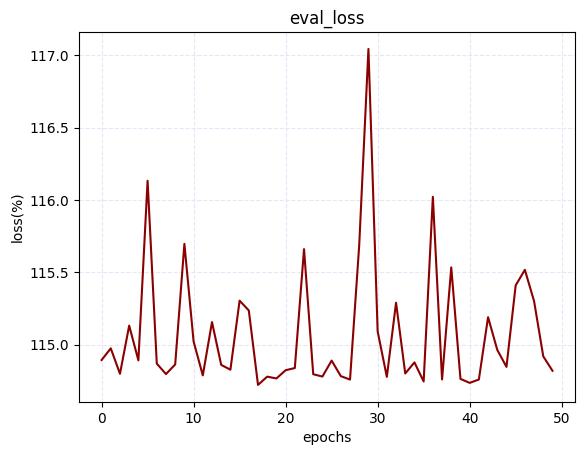

In [402]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(x,eval_loss_log, label='eval_loss', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('loss(%)')
plt.title('eval_loss')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

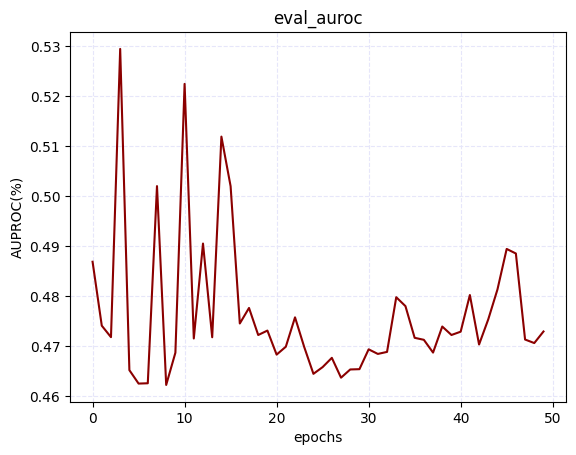

In [403]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auroc_log, label='eval_auroc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPROC(%)')
plt.title('eval_auroc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

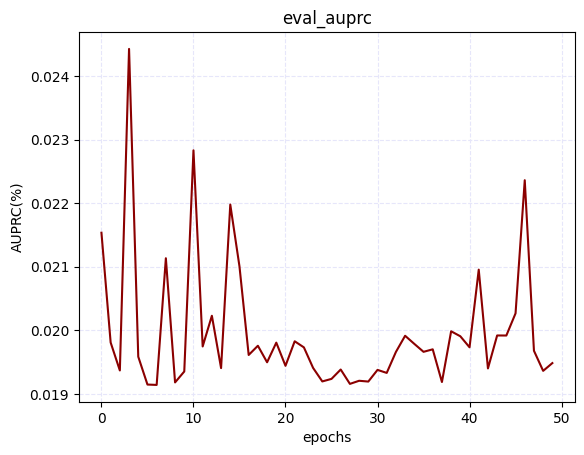

In [404]:
# 도화지 생성
fig = plt.figure()
plt.plot(x, eval_auprc_log, label='eval_auprc', color='darkred')
# 축 이름
plt.xlabel('epochs')
plt.ylabel('AUPRC(%)')
plt.title('eval_auprc')
plt.grid(linestyle='--', color='lavender')
# 그래프 표시
plt.show()

In [820]:
output_model_file

'ot/bm'

In [823]:
len(model_to_save.state_dict().keys())

106

In [ ]:
# disease similarity

In [ ]:
# Access the word_embeddings.weight tensor
word_embeddings = model['bert.embeddings.word_embeddings.weight'] #model.bert.embeddings.word_embeddings.weight

# Convert the tensor to a NumPy array
word_embeddings_np = word_embeddings.cpu().detach().numpy()

# Create a dictionary to map word to embedding
word_to_embedding = {}
for i, word in enumerate(tokenizer.vocab.keys()):
    word_to_embedding[word] = word_embeddings_np[i]
# Example usage: Retrieve the embedding for a specific word
word = 'example'
word_index = tokenizer.convert_tokens_to_ids(word)
word_embedding = word_to_embedding[word]

In [822]:
model_to_save.state_dict().keys()

odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.segment_embeddings.weight', 'bert.embeddings.age_embeddings.weight', 'bert.embeddings.posi_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.wei

In [1]:
# model_to_save.state_dict()

In [ ]:
#################################
#BertTopic

In [23]:
! pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.2 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.5 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp39-cp39-linux_x86_64.whl size=828101 sha256=3a18513a8ef7f06653a62f6b91ebb3f11b938c5c4e59148bb73bb56b183e29b6
  Stored in directory: /home/skbae/.cache/pip/wheels/28/5e/ed/5989da4cc423a222a47cbb4fde5d6c0eff4590d922e45f233c
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=4076098e4ee08a06d37d9b638dddf5eed7c2bad93368d1fa8b8f2a7b255bf7b5
  Stored in directory: /home/skbae/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b

In [24]:
! pip install bertopic[visualization]

In [25]:
! pip install bertopic[spacy]

In [27]:
! pip install openai

In [ ]:
!pip install openai
!pip install bertopic 
from IPython.display import clear_output
clear_output()

In [26]:
#import packages
import pandas as pd 
import numpy as np
from bertopic import BERTopic

Step 1. Load Data

In [ ]:
#load data 
import pandas as pd 
 
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/tokyo_2020_tweets.csv", engine='python')
 
# select only 6000 tweets 
df = df[0:6000]

Step 2. Create Model

In [ ]:
# create model 
 
model = BERTopic(verbose=True)
 
#convert to list 
docs = df.text.to_list()
 
topics, probabilities = model.fit_transform(docs)

Step 3. Select Top Topics

In [6]:
model.get_topic_freq().head(11)

NameError: name 'model' is not defined

Step 4. Select One Topic

In [ ]:
model.get_topic(6)

Step 5:Topic Modeling Visualization

Visualize Topics

In [7]:
model.visualize_topics()

NameError: name 'model' is not defined

Visualize Terms

In [ ]:
model.visualize_barchart()

Visualize Topic Similarity

In [ ]:
model.visualize_heatmap()

Topic Reduction

In [ ]:
#opt1 : fixed :20
model = BERTopic(nr_topics=20)

In [ ]:
#opt2
model = BERTopic(nr_topics="auto")

In [ ]:
#opt3 :reduce the number of topics after training the model
new_topics, new_probs = model.reduce_topics(docs, topics, probabilities, nr_topics=15)

Step 6:Make Prediction

topics, probs = model.transform(new_docs)

Step 7:Save Model

In [ ]:
model.save("my_topics_model")

Step 8:Load Model

In [ ]:
BerTopic_model = BERTopic.load("my_topics_model")

In [ ]:
# Tip:  https://medium.com/geekculture/nlp-tutorial-topic-modeling-in-python-with-bertopic-da760e1d03aa
# model = BERTopic(language="German")

In [ ]:
#https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sentence_transformers import SentenceTransformer

docs = fetch_20newsgroups(subset='all')['data']
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model)